## Introduction

We want to build an axisymmetric distribution that is Toomre stable inside a certain radius and then unstable outside.
First we need to remember what is the toomre parameter definition.

$$
    Q(R) = \dfrac{\sigma(R)\ k(R)}{G\ \Sigma(R)}
$$

with $k = $ epicyclic frequency, defined as the radial frequency of orbits, and calculated as

$$
    k^2 = \dfrac{\partial^2 \phi_\mathrm{eff}}{\partial R^2}\bigg|_{R=0,\ z=0} = R \dfrac{\partial}{\partial R}\Omega^2 + 4\Omega^2
$$

with $\Omega$ orbital frequency.

Then we have $\sigma$, the dispersion velocity

$$
    \sigma = \sqrt{v^2 - \left(\bar v\right)^2}
$$

and $\Sigma$ the surface density.

### Kuzmin disk
The Kuzmin disk density profile is

$$
\rho \left( R \right) = \Sigma(r, \theta)\delta(z)
$$

With

$$
\Sigma(r, \theta) = \dfrac{M_\mathrm{tot}}{2\pi}\dfrac{a}{(r^2+a^2)^{3/2}}
$$

$\newline$

To initialize the Kuzmin disk we need to set the correct distributions for our particles cartesian coordinates. To do so we first need to find the cylindrical coordinates and then project them onto the cartesian plane. 

The mass can be found by simple integration over the volume, which yields

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \int_0^{\theta}d\theta \int_{-\infty}^{z} \delta(z)\ dz \int_0^{r}\dfrac{a}{(r^2+a^2)^{3/2}}r\ dr
$$
<br>

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \theta\  \Theta_\mathrm{HS}(z)\ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right)
$$

$\newline$
The heaviside theta function is 0 everywhere except in z=0, therefore

<br>

$$
    M(r, \theta, z) = 
    \begin{cases}
    0 && z\neq 0 \\
    M_\text{tot} \dfrac{\theta}{2\pi} \ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right) && z = 0
    \end{cases}
$$
<br>

Inverting the relation for $\xi = M(r)/M_{tot}$ we obtain the cdfs, while we already had the pdfs (integrands in the mass calculation)

<br>

$$
\begin{cases}
    p(r) = \dfrac{ra}{(r^2+a^2)^{3/2}} \\
    p(\theta) = {1}/{2\pi} \\
    p(z) = \delta(z)
\end{cases}
$$

<br>

$$
\begin{cases}
    P(r) = 1 - \dfrac{a}{\sqrt{a^2+r^2}} \\
    P(\theta) = {\theta}/{2\pi} \\
    P(z) = \Theta_\mathrm{HS}(z)
\end{cases}
$$

And their inverse are

$$
\begin{cases}
    r(P) = a \sqrt{\dfrac{1}{(P-1)^2} - 1} \\
    \theta(P) = 2\pi P\\
    z(P) = 0
\end{cases}
$$

Now we can initialize the disk

### Calculation
We want to keep things simple so we will take the Kuzmin disk

$$
    \phi(r,z) = - \dfrac{GM}{\sqrt{r^2+(a+|z|)^2}}
$$

With surface density

$$
    \Sigma(r) = \dfrac{M_\mathrm{tot}}{2\pi}\dfrac{a}{(r^2+a^2)^{3/2}}
$$

To initialize the Kuzmin disk we need to set the correct distributions for our particles cartesian coordinates. To do so we first need to find the cylindrical coordinates and then project them onto the cartesian plane. 

The mass can be found by simple integration over the volume, which yields

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \int_0^{\theta}d\theta \int_{-\infty}^{z} \delta(z)\ dz \int_0^{r}\dfrac{a}{(r^2+a^2)^{3/2}}r\ dr
$$
<br>

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \theta\  \Theta_\mathrm{HS}(z)\ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right)
$$

$\newline$
The heaviside theta function is 0 everywhere except in z=0, therefore

<br>

$$
    M(r, \theta, z) = 
    \begin{cases}
    0 && z\neq 0 \\
    M_\text{tot} \dfrac{\theta}{2\pi} \ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right) && z = 0
    \end{cases}
$$
<br>

Inverting the relation for $\xi = M(r)/M_{tot}$ we obtain the cdfs, while we already had the pdfs (integrands in the mass calculation)

<br>

$$
\begin{cases}
    p(r) = \dfrac{ra}{(r^2+a^2)^{3/2}} \\
    p(\theta) = {1}/{2\pi} \\
    p(z) = \delta(z)
\end{cases}
$$

<br>

$$
\begin{cases}
    P(r) = 1 - \dfrac{a}{\sqrt{a^2+r^2}} \\
    P(\theta) = {\theta}/{2\pi} \\
    P(z) = \Theta_\mathrm{HS}(z)
\end{cases}
$$

And their inverse are

$$
\begin{cases}
    r(P) = a \sqrt{\dfrac{1}{(P-1)^2} - 1} \\
    \theta(P) = 2\pi P\\
    z(P) = 0
\end{cases}
$$

We now can initialize a Kuzmin disk, choose a radius $a$ and have $Q>1$ inside $a$ and $Q<1$ outside $a$. We can calculate $k$ by computing the second derivative and we already have $\Sigma$. We can, therefore, evaluate $\sigma$.

We can then find the velocities of the particles by imposing a circular orbit and treat $\sigma$ as the deviation from that orbit. Our velocities will therefore be gaussian distributed. 

### Kuzmin disk initialization

In [60]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.style.use('../../sim.mplstyle')
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.insert(1, '../')
from gdsam import initial_data

In [61]:
#constants
M = 1
N = int(1e4)
G = 1
a = 10

In [62]:
def phi(r,z):
    return -G*M/np.sqrt(r**2+(a+abs(z))**2)

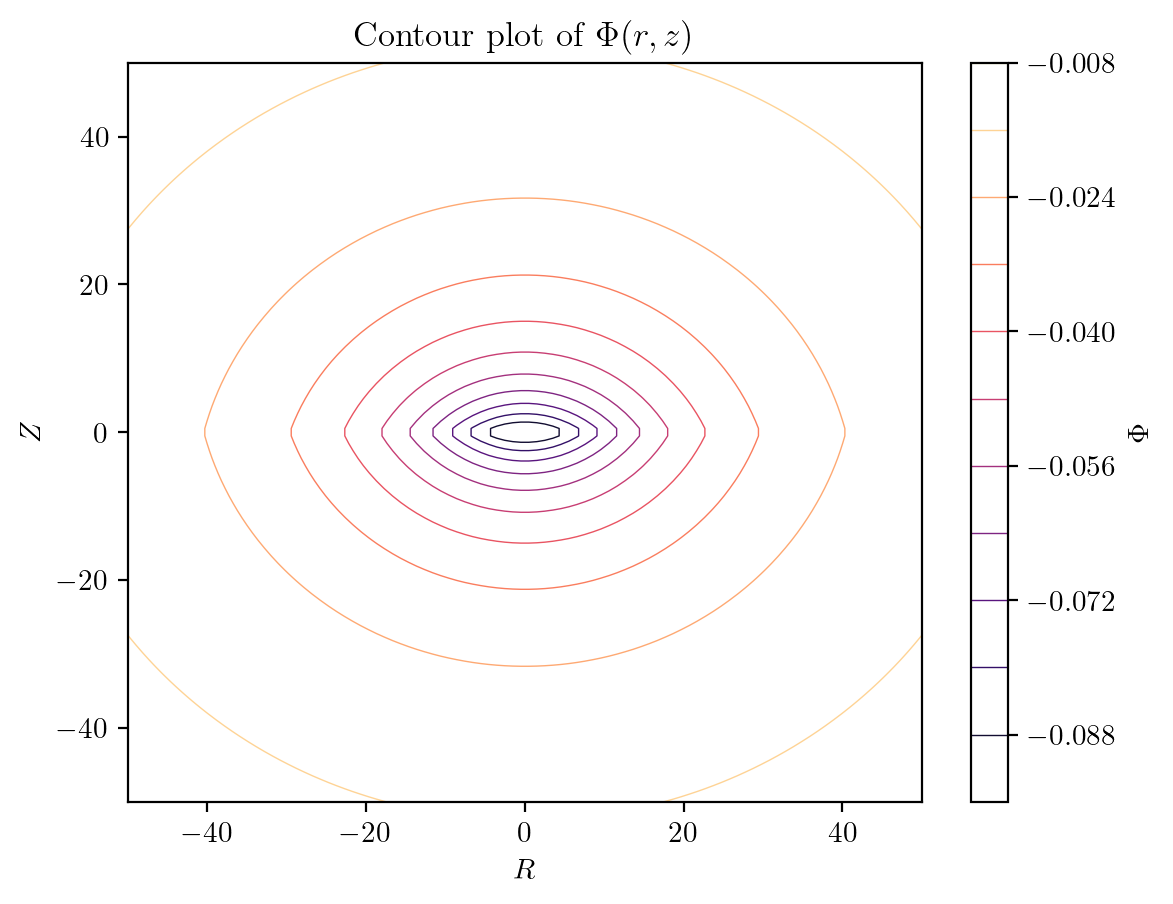

In [63]:
r = np.linspace(-50,50,100)
z = np.linspace(-50,50, 100)
R,Z = np.meshgrid(r,z)
Phi = phi(R,Z)


# Create the contour plot
plt.contour(R, Z, Phi, 10)
plt.xlabel(r'$R$')
plt.ylabel(r'$Z$')
plt.colorbar(label=r'$\Phi$')
plt.title(r'Contour plot of $\Phi(r, z)$')
plt.show()

In [64]:
#analytical pdfs
def pdf_r(r,a):
    return r*a/(r**2+a**2)**(3/2)

def pdf_theta(theta):
    return np.full(len(theta), 1/(2*np.pi))

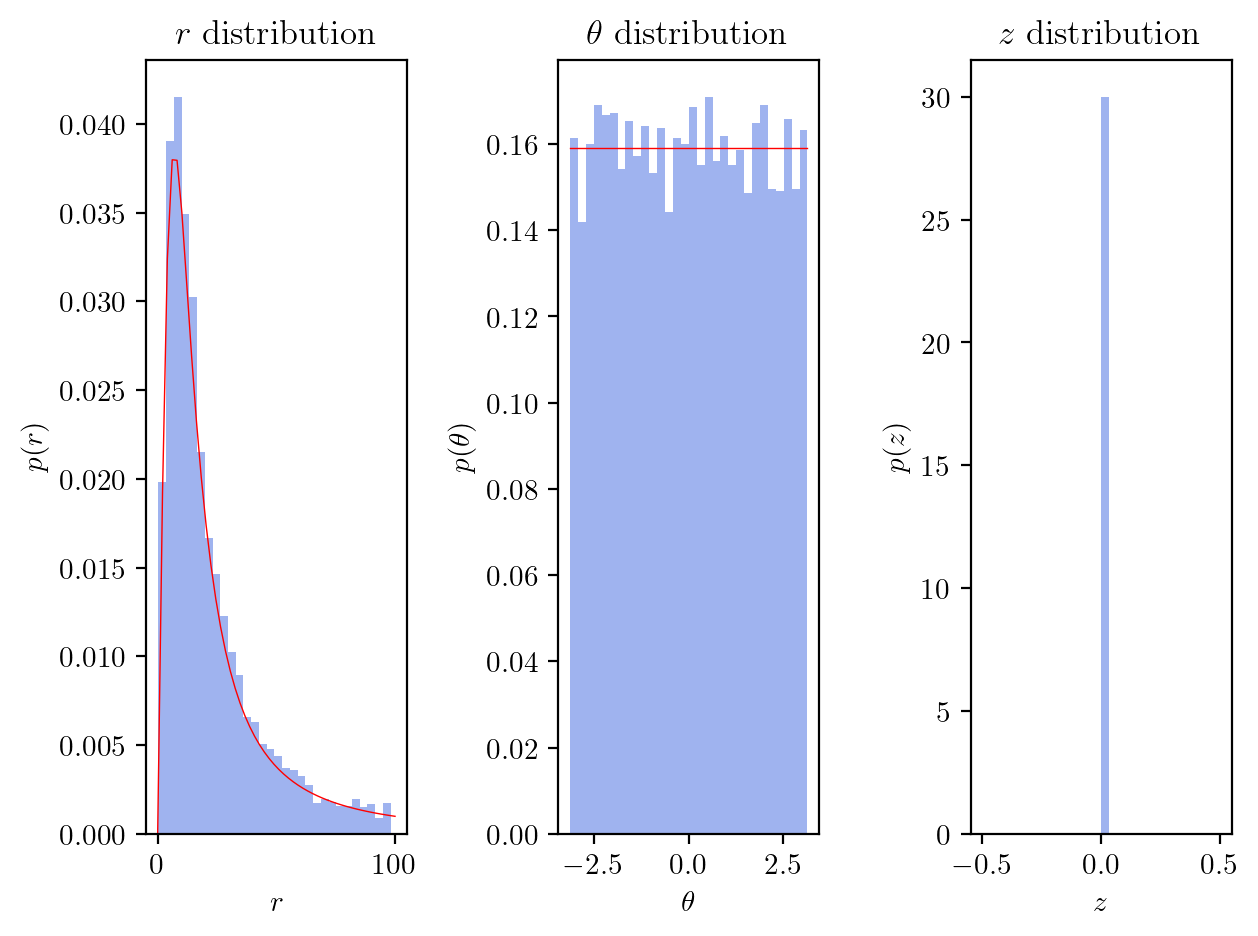

In [65]:
disk = initial_data()
disk.disk(N, M, a)

fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False)
b=30

remove_outliers= disk.r<np.percentile(disk.r,90)
r_ = np.linspace(0,100)
theta_ = np.linspace(-np.pi,np.pi)
z_ = np.linspace(-10,10)

axs[0].set(title=fr'$r$ distribution', xlabel=r'$r$', ylabel=r'$p(r)$')
axs[0].hist(disk.r[remove_outliers], bins=b, density=True, alpha=.5, color='royalblue', lw=0)
axs[0].plot(r_, pdf_r(r_, a), c='r')
axs[1].set(title=fr'$\theta$ distribution', xlabel=r'$\theta$', ylabel=r'$p(\theta)$')
axs[1].hist(disk.theta, bins=b, density=True, alpha=.5, color='royalblue', lw=0)
axs[1].plot(theta_, pdf_theta(theta_), c='r')
axs[2].set(title=fr'$z$ distribution', xlabel=r'$z$', ylabel=r'$p(z)$')
axs[2].hist(disk.z, bins=b, density=True, alpha=.5, color='royalblue', lw=0)

plt.show()

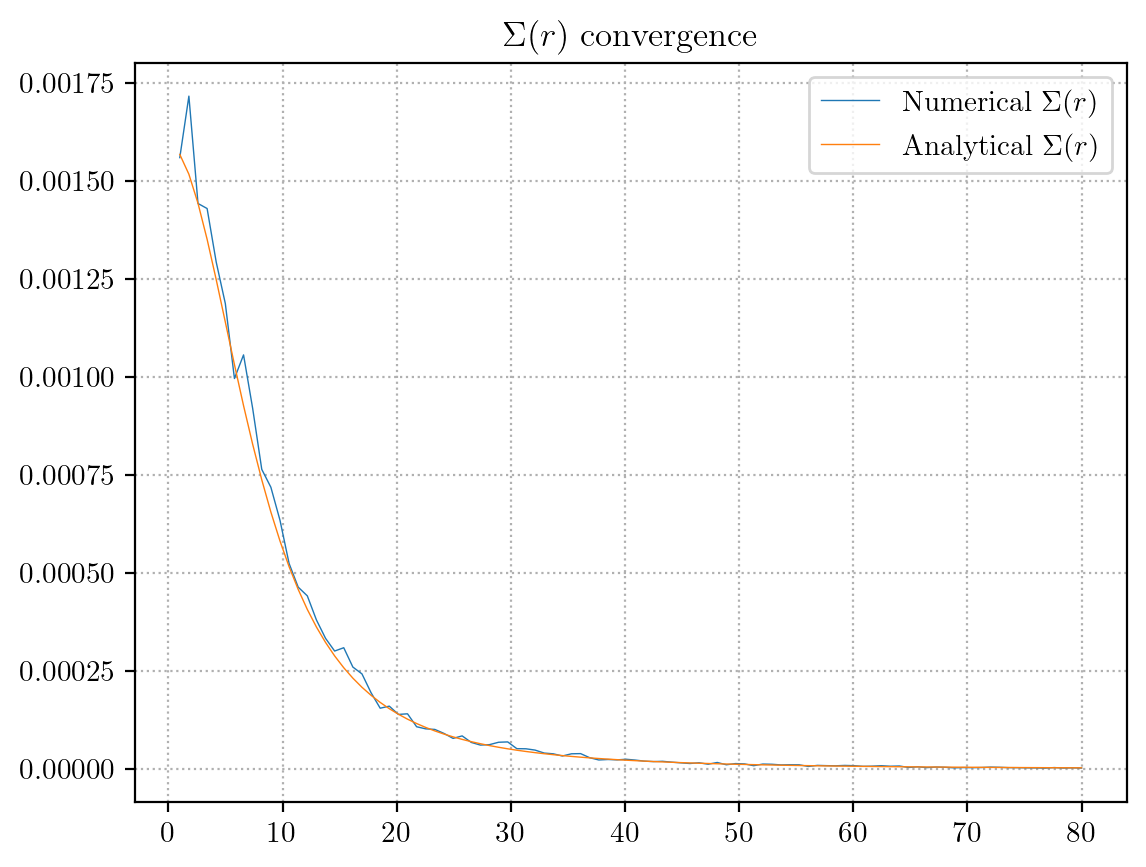

In [66]:
R = disk.r
z = disk.z

#caclulating the density in shells of width dr
sigma_r = []
dr = 1
scan = np.linspace(dr,80, 100)

for i in scan:#up to a raidus of 100
    mask = np.logical_and(disk.r > i-dr, disk.r < i)
    sigma_i = np.sum(disk.m[mask])/(np.pi*(i**2 - (i-dr)**2))
    sigma_r.append(sigma_i)
    
sigma_r = np.array(sigma_r)    
Sigma = (M)/(2*np.pi) * a/((scan**2+a**2)**(3/2))

plt.plot(scan, sigma_r, label=r'Numerical $\Sigma(r)$')
plt.plot(scan, Sigma, label=r'Analytical $\Sigma(r)$')
plt.title(r'$\Sigma(r)$ convergence')
plt.grid()
plt.legend()
plt.show()

## Adding a heavy mass at the center
The problem of fragmentation is caused by the facr that at small radii $\sigma > v_\mathrm{circ}$ effectively causing the stars to leave the system. To overcome this problem we will add a keplerian potential at the center caused by a heavy mass $M_p = 1 M_\odot$

Now let's see how things change, first the $\Omega$

$$\Omega^2R = \dfrac{d\phi}{dr} = \dfrac{d}{dr}(\phi + \phi_k) = \dfrac{GM}{\left[R^2+(a+|z|)^2\right]^{3/2}} R + \dfrac{GM_p}{R^2} $$

In [67]:
M_p = 0.5

In [68]:
#Sort in the same order
sort   = np.argsort(disk.r)
disk.r = disk.r[sort]
disk.theta = disk.theta[sort]
disk.x = disk.x[sort]
disk.y = disk.y[sort]
disk.z = disk.z[sort]

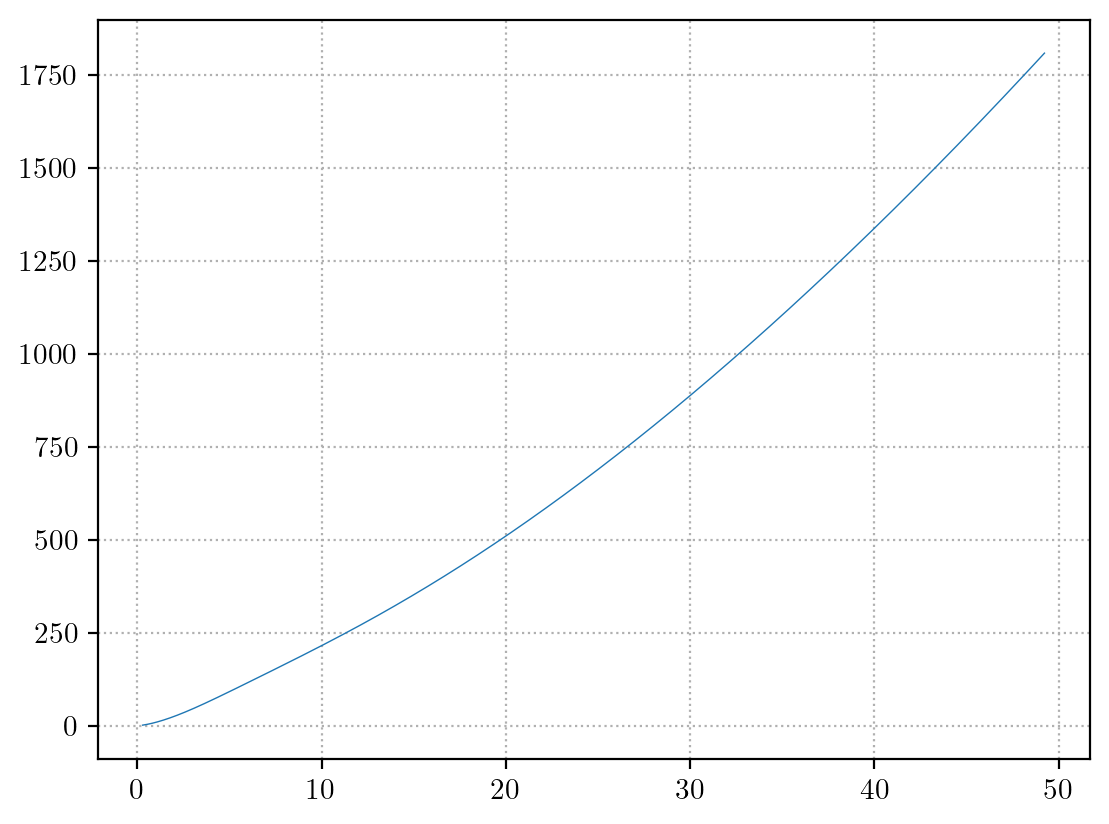

In [69]:
R = disk.r
z = disk.z

a_r = G*M/(R**2 + (a + abs(z))**2)**(3/2) + G*M_p/R**3


omega = np.sqrt(a_r) #angular velocity
T_circ= 2*np.pi/omega

remove_outliers= disk.r<np.percentile(disk.r,80)
plt.plot(R[remove_outliers],T_circ[remove_outliers])

plt.grid()
plt.show()

In [70]:
print(disk.r - np.sqrt(disk.x**2+disk.y**2));

[0. 0. 0. ... 0. 0. 0.]


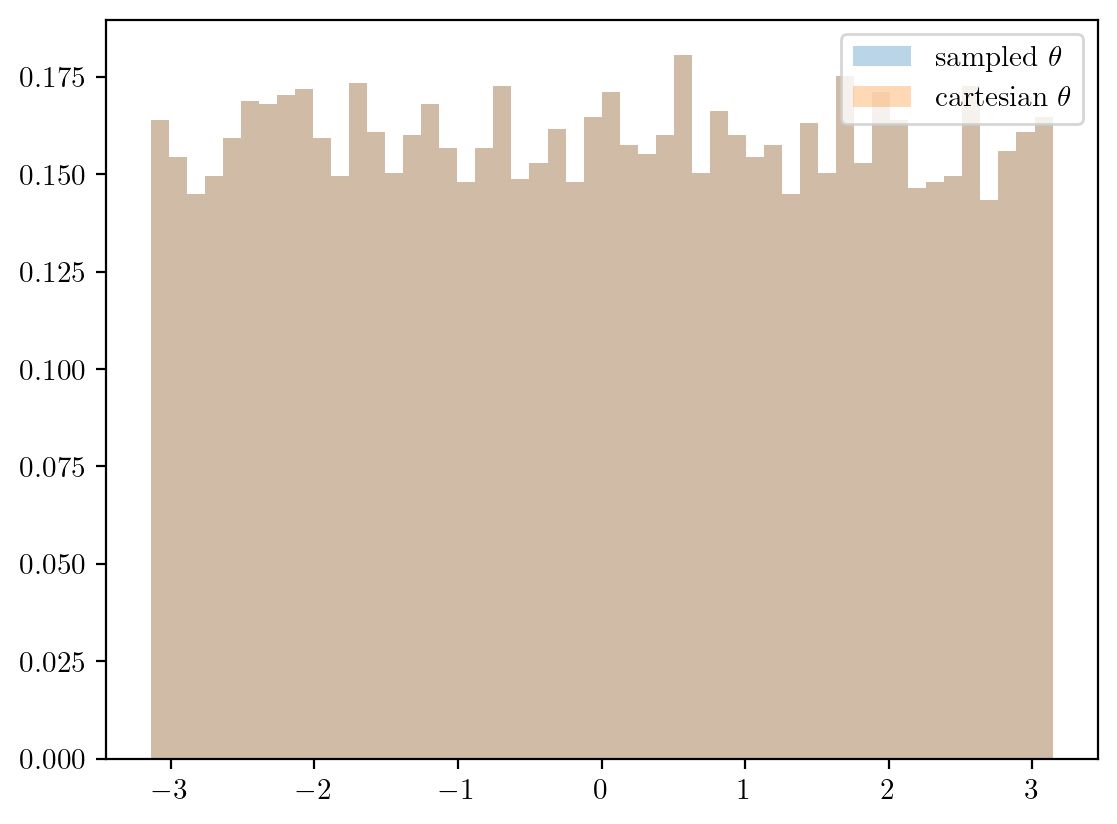

In [71]:
plt.hist(disk.theta, bins=50, alpha=.3, label=r'sampled $\theta$', density=True)
plt.hist(np.arctan2(disk.y, disk.x), bins=50, alpha=.3, label=r'cartesian $\theta$', density=True)
plt.legend()
plt.show()

In [72]:
Sigma = M/(2*np.pi) * a/((R**2+a**2)**(3/2))

The Toomre parameter is defined as 
$$
Q=\frac{\sigma k}{G\Sigma}
$$
We can define $k$, the epicyclic frequency, as 

$$
k^2=\frac{\partial\Phi_{eff}}{\partial R^2}\Big|_{0,0} = \frac{\partial^2}{\partial R^2} \phi + \frac{\partial^2}{\partial R^2} l_z = R \frac{\partial}{\partial R}\Omega^2 + 4\Omega^2
$$

Therefore we get
$$
    k^2 = -3\dfrac{GMR^2}{\left[R^2 + (a+|z|)^2\right]^{5/2}} + 4\dfrac{GM}{\left[R^2+(a+|z|)^2\right]^{3/2}} = \Omega^2\left(4 -  3\dfrac{R^2}{R^2 + (a+|z|)^2}\right)
$$

And so 

$$
    k =\sqrt{4 -  3\dfrac{R^2}{R^2 + (a+|z|)^2}}\ \Omega
$$

In [73]:
k = np.sqrt(4 - 3*R**2/(R**2+(a+abs(z))**2))*omega

Let's plot a few informative graphs to ensure we will keep a razor thin disk

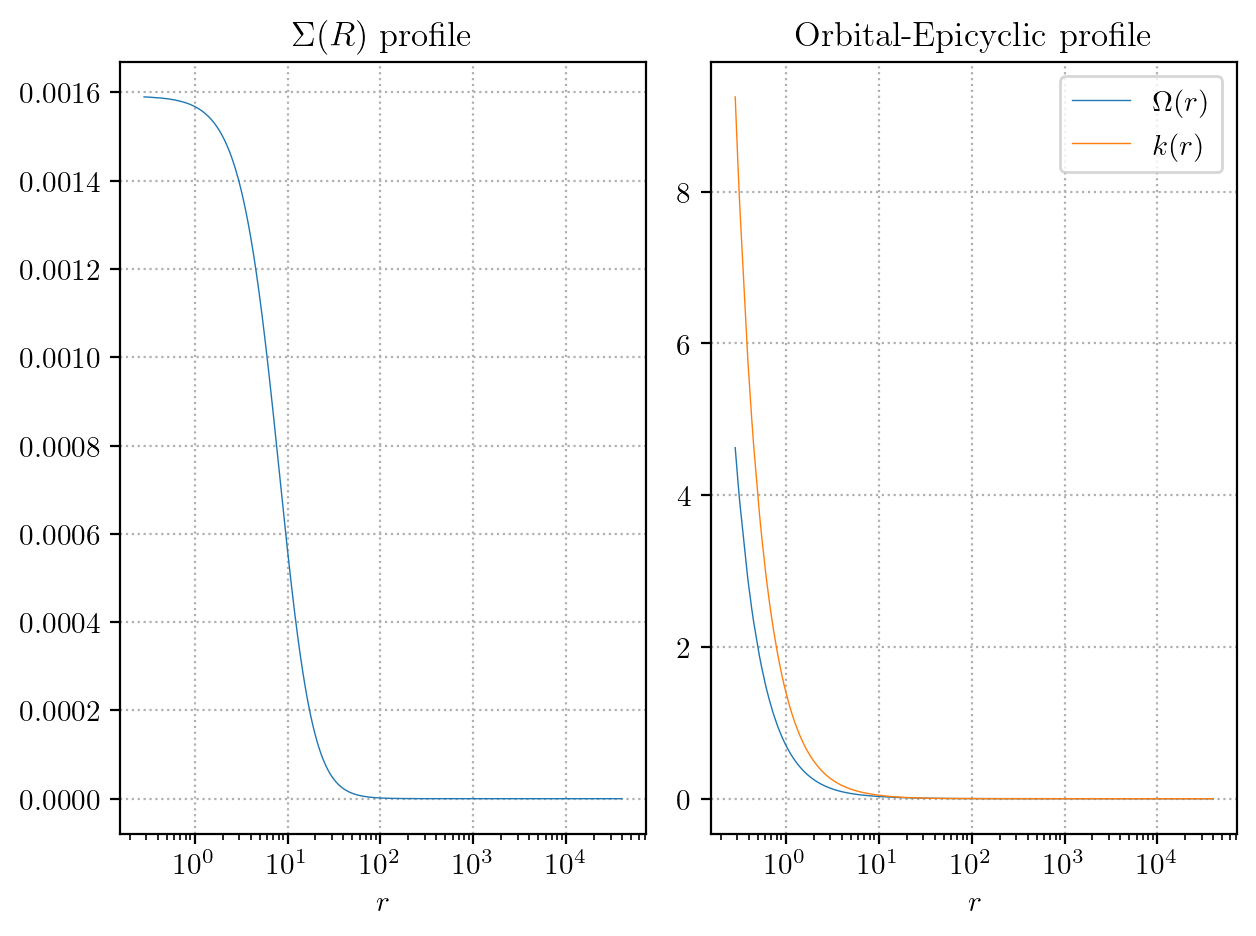

In [74]:
fig, axs = plt.subplots(1,2, tight_layout=True)

axs[0].plot(R, Sigma)
axs[0].set(title=fr'$\Sigma(R)$ profile', xscale='log', xlabel=r'$r$')
axs[1].plot(R, omega, label =r'$\Omega(r)$')
axs[1].plot(R, k, label=r'$k(r)$')
axs[1].set(title=fr'Orbital-Epicyclic profile', xscale='log', xlabel=r'$r$')


[ax.grid() for ax in axs]
axs[1].legend()
plt.show()

Now we have an expression for $k$ and $\Sigma$. We can vary the Toomre parameter in a descending manner, that way we will have instability inside and stability outside, or the opposite. We can emply different approaches

In [102]:
#Q = np.full(int(N), 1.5)
Q = np.concatenate((np.full(int(N / 2), 2), np.full(int(N / 2), 0.1))) #step function
#Q = np.linspace(0.1,1,N) #linear
#Q = np.geomspace(0.1,1,N) #logarthmic
print(R[int(N/2)])

17.212907538545345


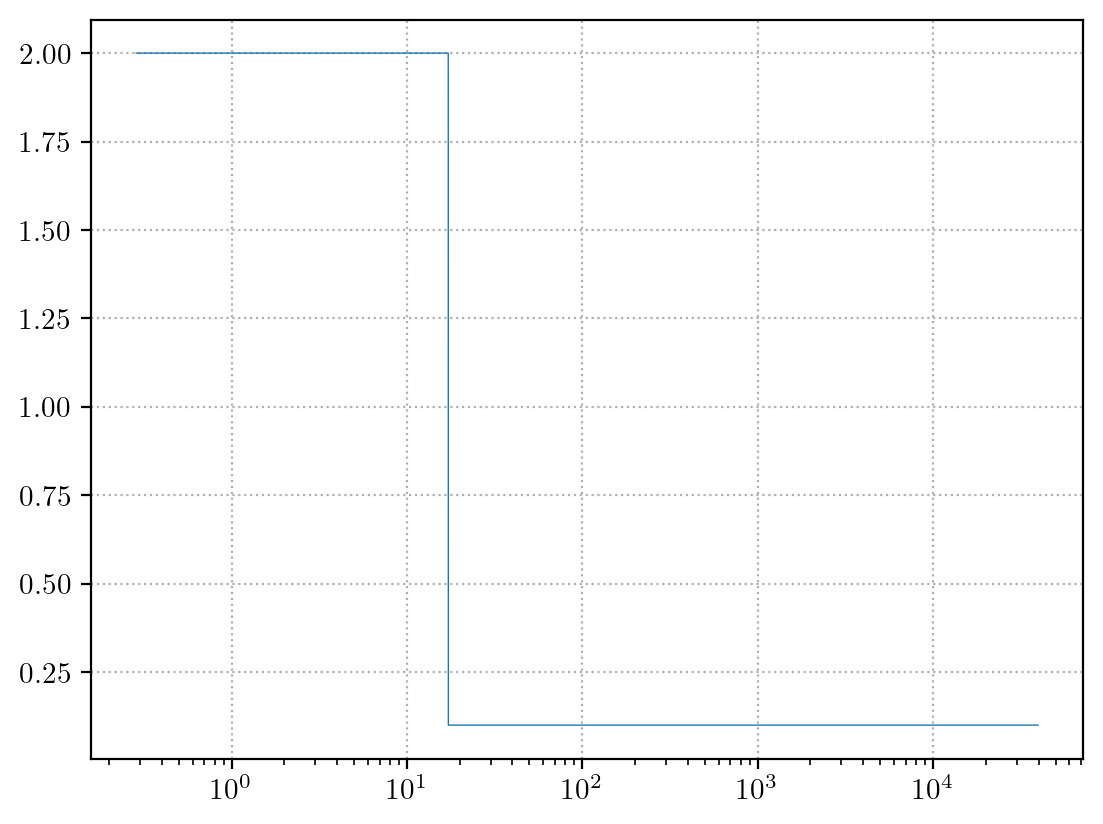

In [76]:
plt.plot(R,Q)
plt.xscale('log')
plt.grid()
plt.show()

Let's now compute $\sigma$ inverting the relation from the Toomre parameter definition

$$
    \sigma = \dfrac{G\ \Sigma(R)}{k}\ Q
$$

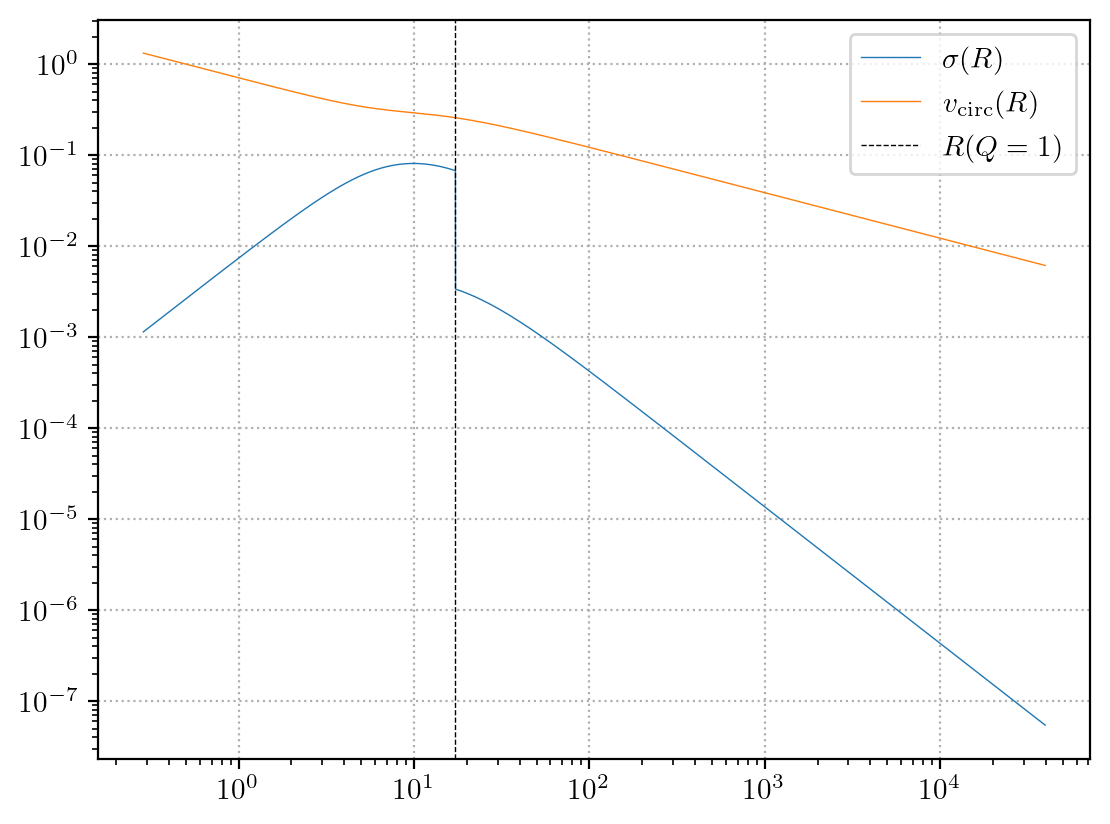

In [78]:
v_disp = 3.33*(G*Sigma/k)*Q #velocity dispersion a.k.a sigma

plt.plot(R,v_disp, label=r'$\sigma(R)$')
plt.plot(R,omega*R, label=r'$v_\mathrm{circ}(R)$')
plt.axvline(R[np.abs(Q - 1).argmin()], c='k', ls='--', label=r'$R(Q=1)$')


plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

We can use the dispersion as the standard deviation of a gaussian distribution centered around the circular velocities at every radius. The expression for those velocities in the cartesian plane is

$$
\dot{x}= \dfrac{d}{dt}\left(R \cos \theta \right) = \dot{R}\ \cos \theta - R \sin \theta\dot{\theta} = - R \sin \theta\dot{\theta}
$$ 

$$
\dot{y}=\dfrac{d}{dt}\left(R \sin \theta \right) = \dot{R}\sin \theta + R \cos \theta\dot{\theta} = R \cos \theta\dot{\theta}
$$

$$
\dot{z}=\dfrac{dz}{dt} = 0 
$$
<br>

where $\dot R = 0$  since circular orbits and $\dot{z} = 0 $ due to $z=0$ for the Kuzmin distribution.

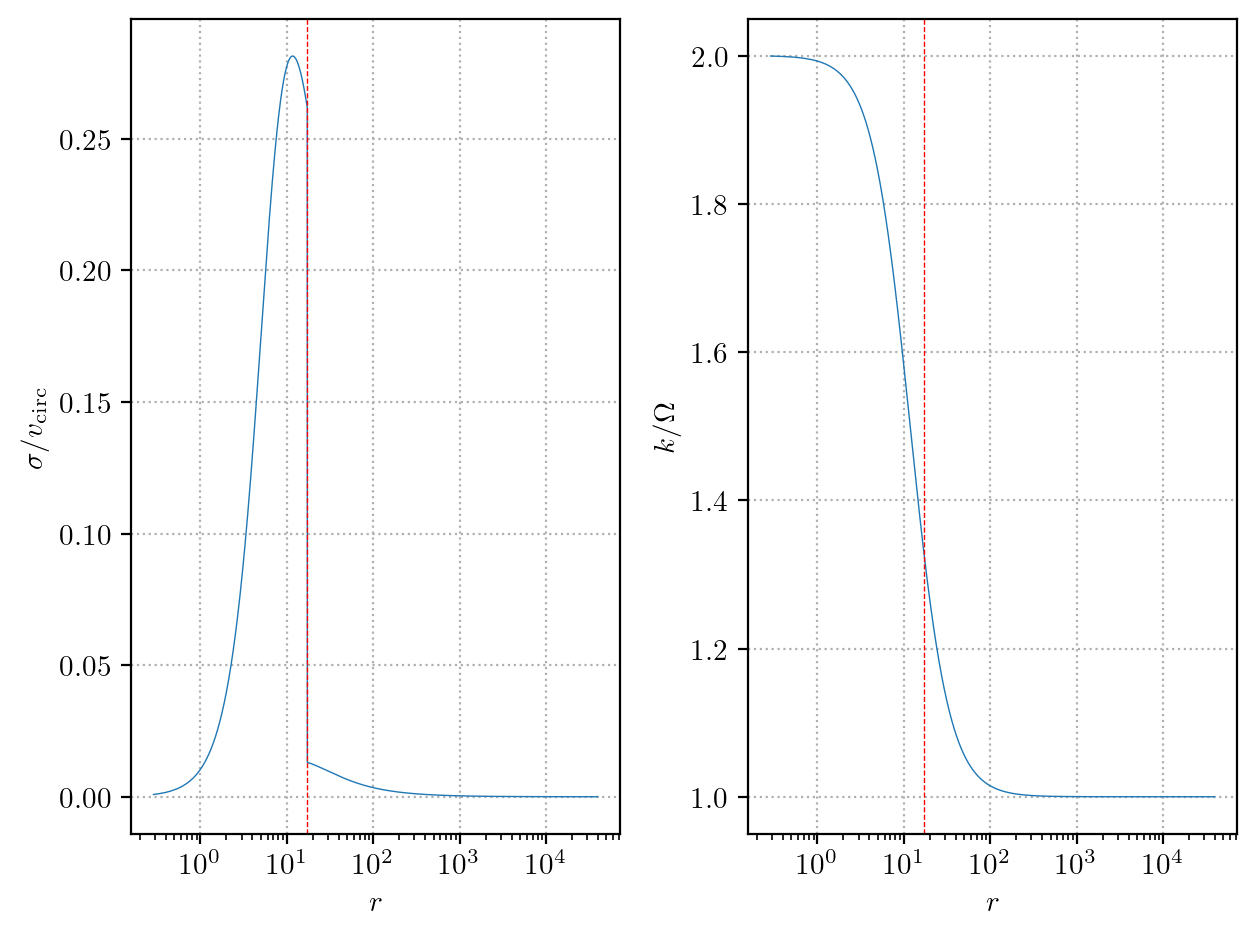

In [79]:
fig, axs = plt.subplots(1,2, tight_layout=True)

axs[0].plot(R, v_disp/(omega*R))
axs[0].set(xscale='log',
           xlabel= r'$r$', ylabel= r'$\sigma/v_\mathrm{circ}$')
axs[0].axvline(R[np.abs(Q - 1).argmin()], c='r', ls='--')
axs[1].plot(R, k/omega)
axs[1].set(xscale='log', 
           xlabel= r'$r$', ylabel= r'$k/ \Omega$')
axs[1].axvline(R[np.abs(Q - 1).argmin()], c='r', ls='--')

[ax.grid() for ax in axs]

plt.show()

In [80]:
x_dot = -R*np.sin(disk.theta)*omega
y_dot =  R*np.cos(disk.theta)*omega

In [81]:
#each v_x is sampled from a different gaussian centered in x_dot[i] with dispersion v_disp[i]
v_x     = np.random.normal(x_dot, v_disp)
v_y     = np.random.normal(y_dot, v_disp)
v_z     = np.zeros(N)

In [82]:
i = np.random.randint(0,N)
print(f'Percentual dispersion for the {i}th particle {abs(v_disp[i]/x_dot[i]*100):.2f} %')

Percentual dispersion for the 7308th particle 0.89 %


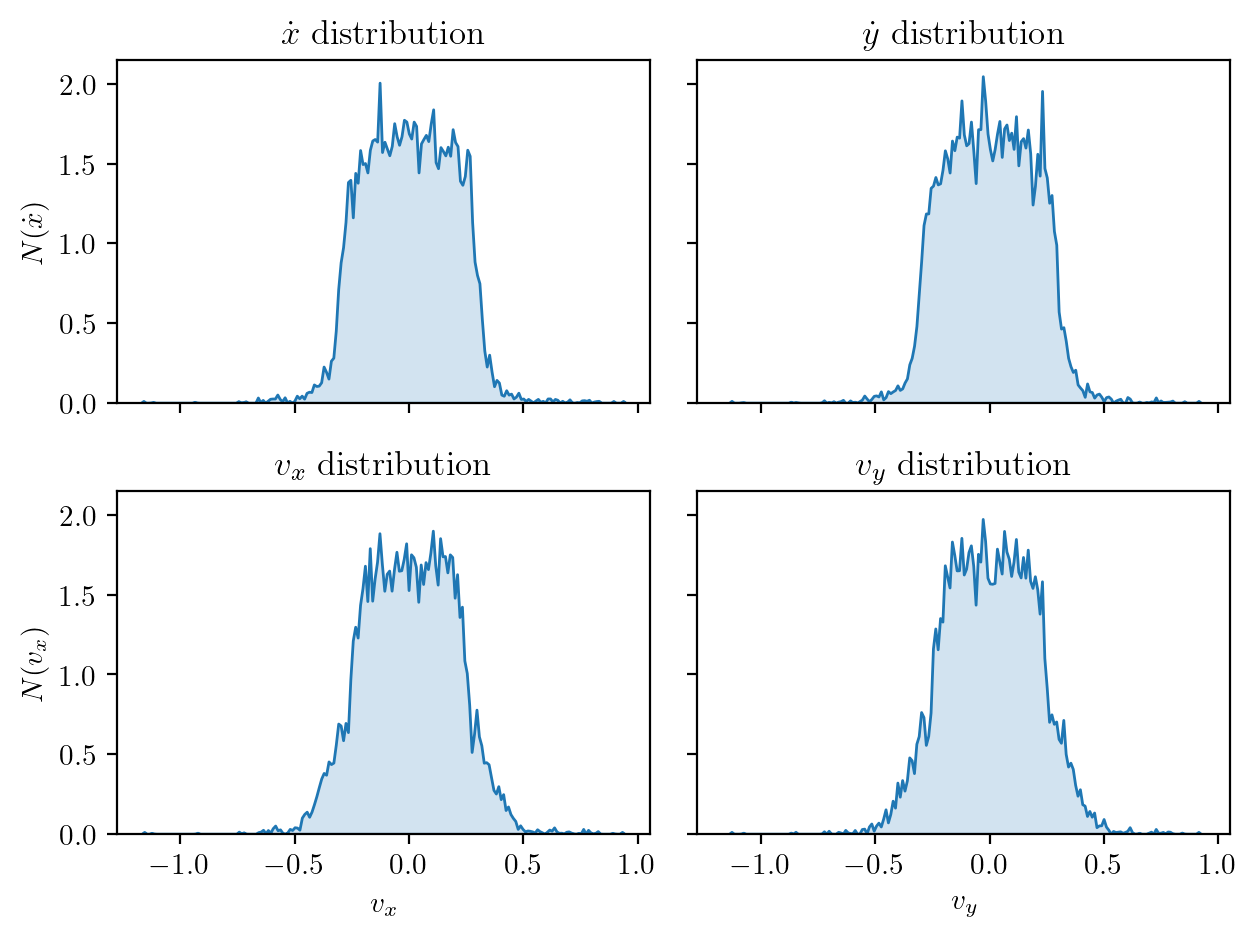

In [83]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, tight_layout=True, sharex=True, sharey=True)

sns.kdeplot(x_dot, ax=axs[0, 0], fill=True, alpha=0.2, bw_adjust=0.1)
axs[0, 0].set(title=fr'$\dot x$ distribution', xlabel=r'$\dot x$', ylabel=r'$N(\dot x)$')

sns.kdeplot(y_dot, ax=axs[0, 1], fill=True, alpha=0.2, bw_adjust=0.1)
axs[0, 1].set(title=fr'$\dot y$ distribution', xlabel=r'$\dot y$', ylabel=r'$N(\dot y)$')

sns.kdeplot(v_x, ax=axs[1, 0], fill=True, alpha=0.2, bw_adjust=0.1)
axs[1, 0].set(title=fr'$v_x$ distribution', xlabel=r'$v_x$', ylabel=r'$N(v_x)$')

sns.kdeplot(v_y, ax=axs[1, 1], fill=True, alpha=0.2, bw_adjust=0.1)
axs[1, 1].set(title=fr'$v_y$ distribution', xlabel=r'$v_y$', ylabel=r'$N(v_y)$');

In [84]:
disk.set_velocities(v_x,v_y,v_z)

### The distribution

In [85]:
x_p, y_p, z_p = (0,0,0) #initialize perturber at the center
vx_p, vy_p, vz_p = (0,0,0) #the perturber is still
R_p, theta_p = (0,0)

In [95]:
properties = ['m', 'r', 'theta', 'x', 'y', 'z', 'vx', 'vy', 'vz']
values = [M_p, R_p,theta_p, x_p, y_p, z_p, vx_p, vy_p, vz_p]

for prop, val in zip(properties, values):
    setattr(disk, prop, np.append(getattr(disk, prop), val)) #adding the perturber

setattr(disk, 'N', N+1) #need to refresh the number of particles

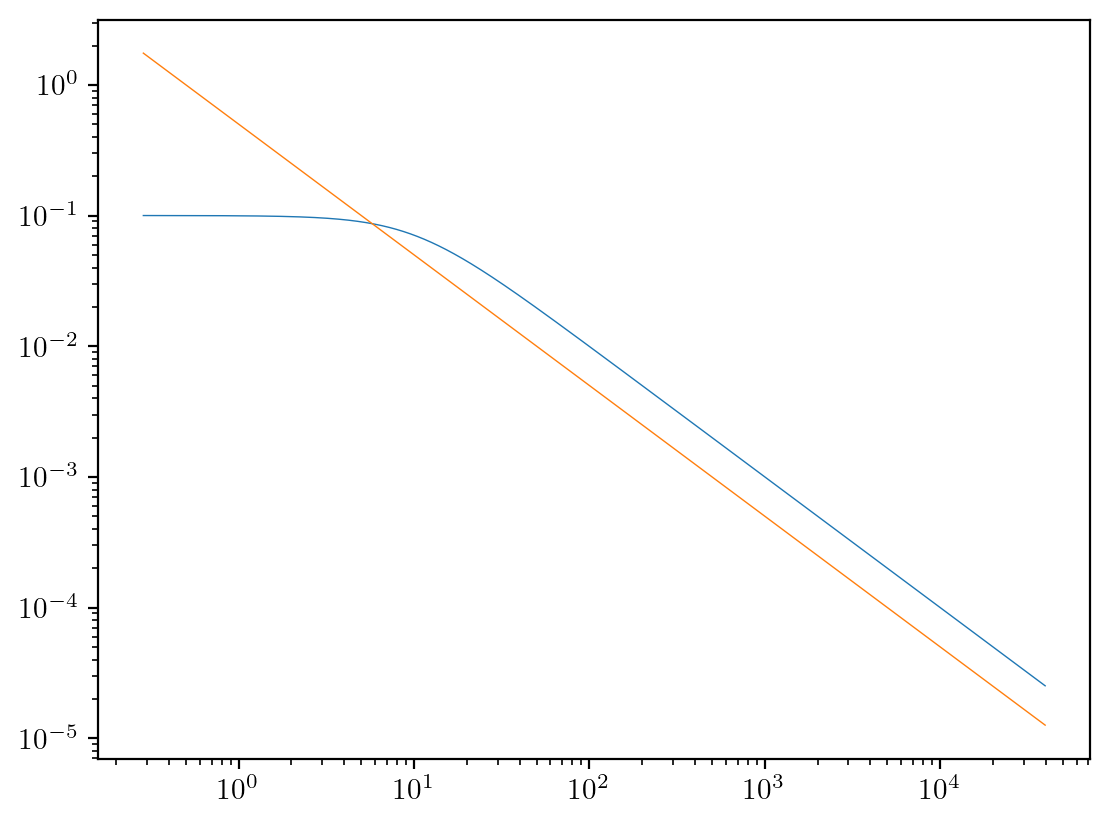

In [96]:
phi_p = -G*M_p/R

plt.plot(R,-phi(R,0))
plt.plot(R,-phi_p)

plt.xscale('log')
plt.yscale('log')

plt.show()

In [100]:
R_inf = R[(phi(R,0)-phi_p).argmin()]
R_Q = R[abs(1-Q).argmin()]

In [101]:
R_Q

17.212907538545345

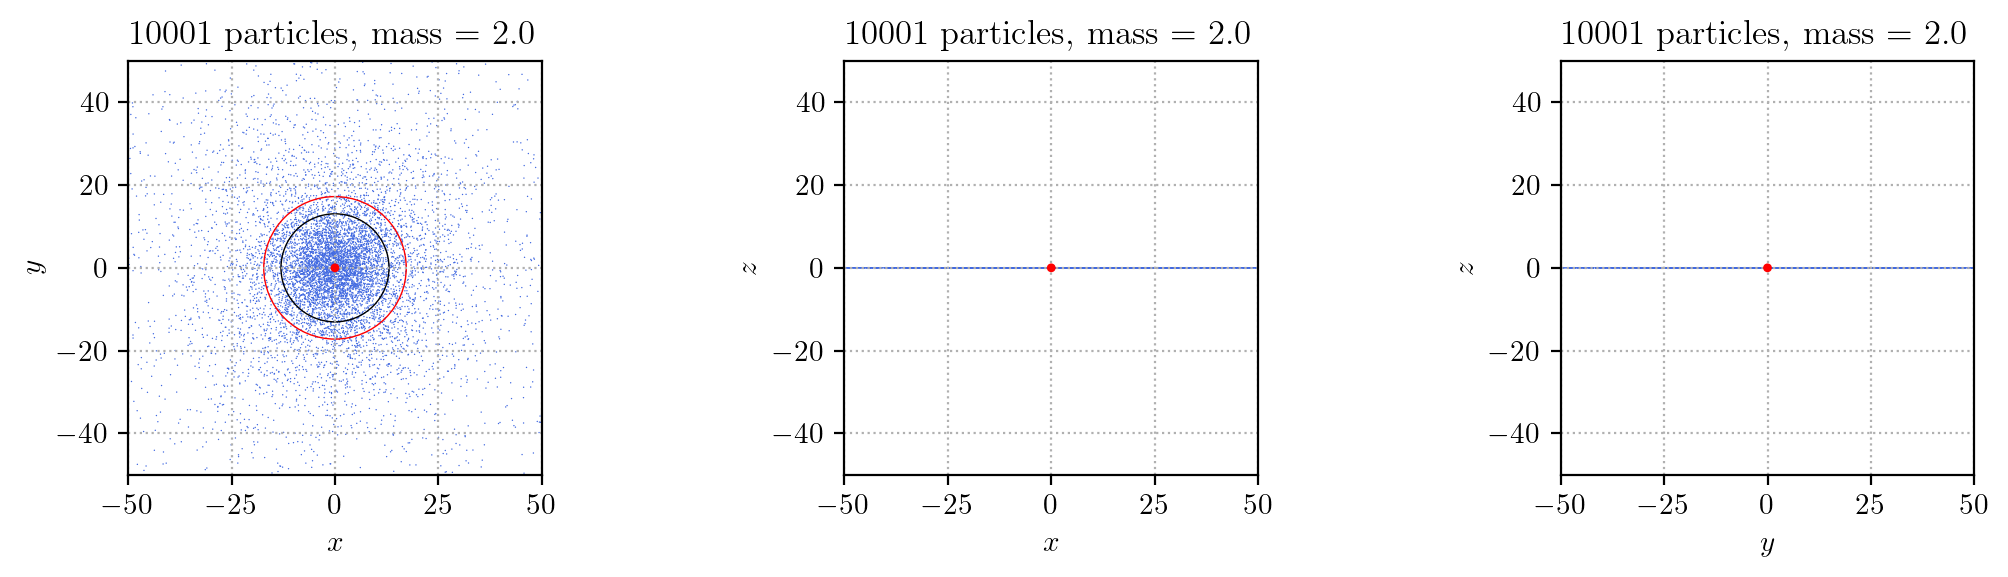

In [103]:
from matplotlib import patches

_, axs = disk.projections(s=.25, a=1, l=50)

axs[0].scatter(disk.x[-1], disk.y[-1], s=10, c='r', zorder=2)
Circle = patches.Circle((disk.x[-1],disk.y[-1]), R_Q, edgecolor='r', facecolor='None', lw=.5)
Circle2 = patches.Circle((0,0), R_inf, edgecolor='k', facecolor='None', lw=.5)
axs[0].add_patch(Circle)
axs[0].add_patch(Circle2)
axs[1].scatter(disk.x[-1], disk.z[-1], s=10, c='r', zorder=2)
axs[2].scatter(disk.y[-1], disk.z[-1], s=10, c='r', zorder=2)

plt.show()

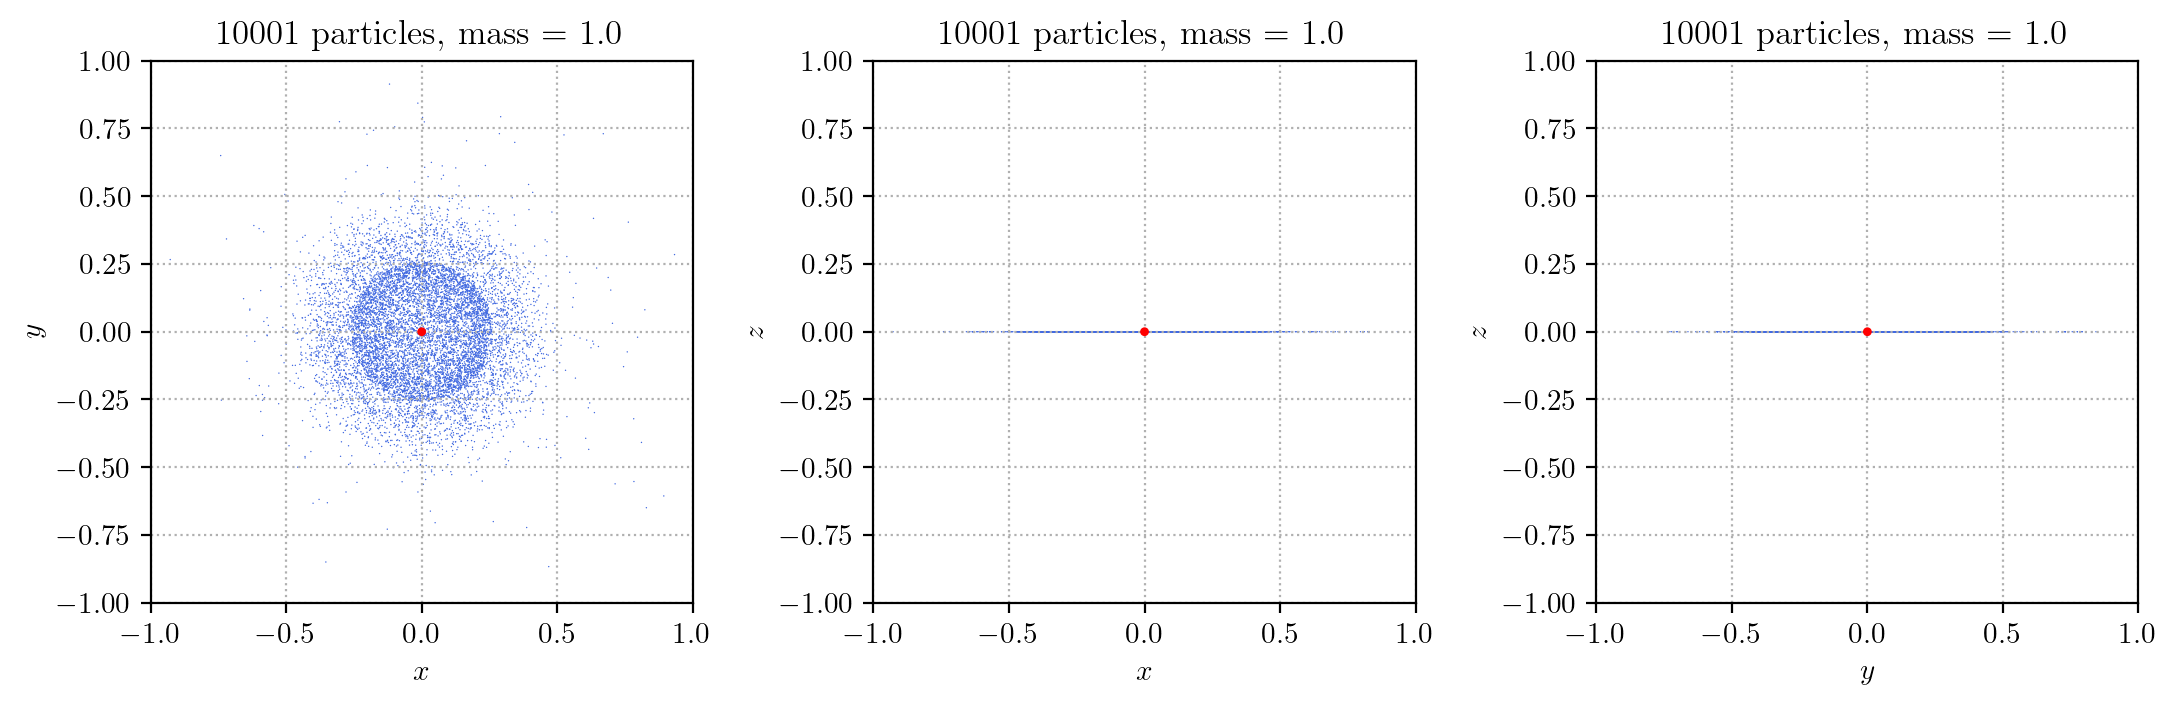

In [104]:
_, axs = disk.v_projections(s=.25, a=1, l=1)

axs[0].scatter(disk.x[-1], disk.y[-1], s=10, c='r', zorder=2)
axs[1].scatter(disk.x[-1], disk.z[-1], s=10, c='r', zorder=2)
axs[2].scatter(disk.y[-1], disk.z[-1], s=10, c='r', zorder=2)

plt.show()

## Running the simulation

In [105]:
home = '../../'
input = home + f'data/inputs/Toomre_stable_{N}_{M_p}.txt' 
output = home + f'data/outputs/Toomre_stable_{N}_{M_p}.txt'
log = f'../../data/outputs/Toomre_stable_{N}_{M_p}_log.txt'

In [106]:
open(input, 'w').close()  #clearing input file
open(output, 'w').close() #clearing output file
open(log, 'w').close()    #clearing log file
disk.write_tree(input)

In [107]:
print(abs(disk.r[-1] - disk.r[0]))

0.28588343635855823


In [108]:
#for the softening i set the minimum distance as the distance between the closest particles/2
epsilon = abs(disk.r[-1] - disk.r[0])

In [109]:
#params
T_sim = 1600
dt = 1/4
theta = 0.1
out = 4*dt

print(f'T_sim = {T_sim:.1f} \t epsilon = {epsilon:.2e} \t dt = {dt:.2f} \t out = {out:.2f}')

T_sim = 1600.0 	 epsilon = 2.86e-01 	 dt = 0.25 	 out = 1.00


In [110]:
os.system(home + f'treecode/tree/treecode in={input} out={output} eps={epsilon} dtime={dt} tstop={T_sim} dtout={out}>{log}')

0

In [111]:
import gdsam

pl = gdsam.plotter()
pl.get_data_tree(output)

Loaded 1e+04 particles


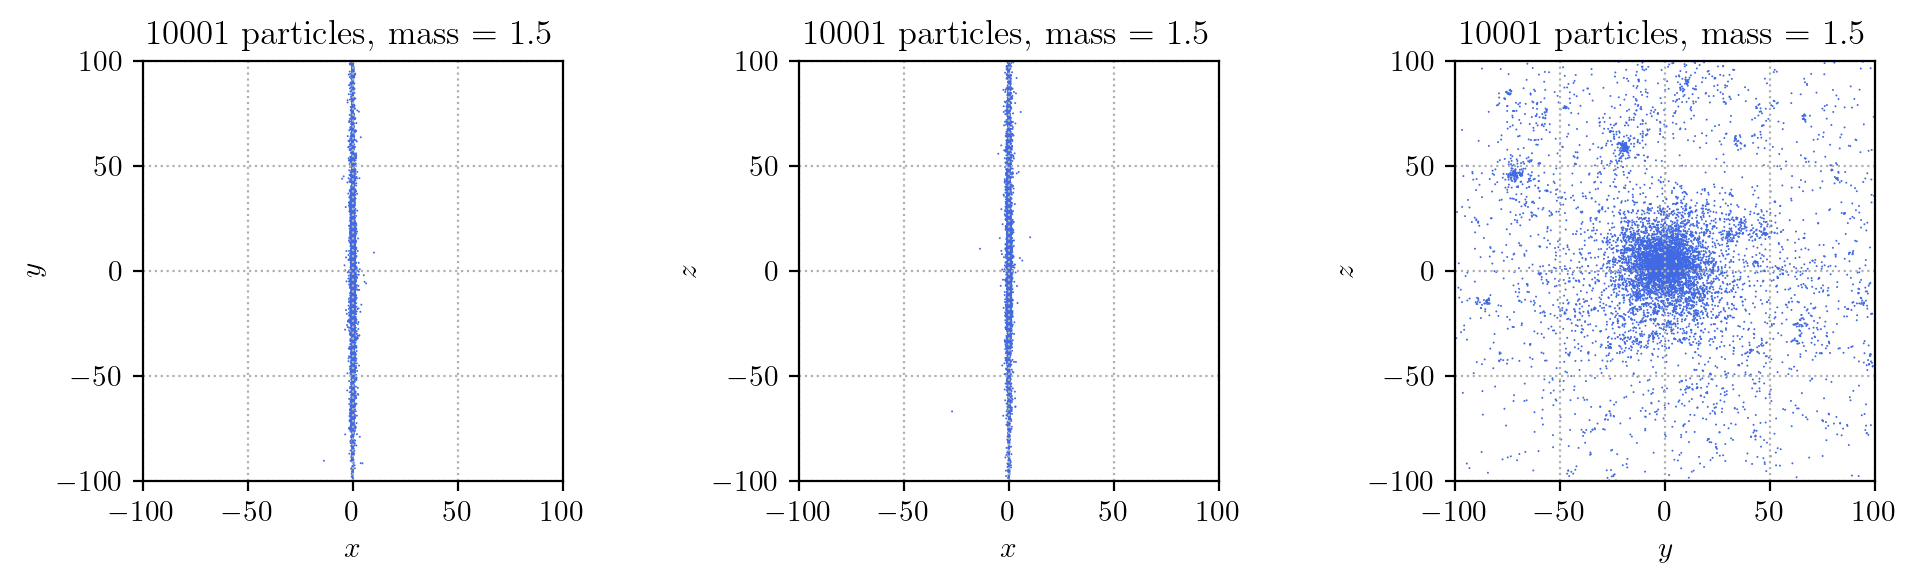

In [112]:
i = -1
fig, axs = plt.subplots(1,3, figsize=(10,3), tight_layout=True)
pl.projections(num=i, l=100, s=.5, axs=axs)
plt.show()

In [114]:
from matplotlib import patches

def animate_2d(self, fig, ax, f_t=1, l=10, a=1, s=10, lw=.5, frame_skip=1, interval=1):
    def update(num):
        ax.clear()
        scatter = ax.scatter(self.y[:, num], self.z[:, num], c='royalblue', s=s, alpha=a)
        ax.set_xlim(-l,l)
        ax.set_ylim(-l,l)
        ax.set(aspect='equal')
        Circle = patches.Circle((self.y[-1,num],self.z[-1,num]), R_Q, edgecolor='r', facecolor='None', lw=.5)
        Circle2 = patches.Circle((0,0), R_inf, edgecolor='k', facecolor='None', lw=.5)
        ax.add_patch(Circle)
        ax.add_patch(Circle2)
        ax.grid()        
        return scatter,

    num_frames = round(f_t*len(self.t))
    ani_2d = animation.FuncAnimation(fig, func=update, frames=tqdm(range(num_frames)[::frame_skip]), interval=interval, blit=True)
    return ani_2d

In [ ]:
fig,ax = plt.subplots()
ani = animate_2d(pl,fig, ax, l=100, s=.5, a=1, frame_skip=4)


ani.save(f'../media/Toomre_stable_{N}_Mp_{M_p}.mp4', dpi=300, fps=30)

  0%|          | 0/401 [00:00<?, ?it/s]

In [42]:
from IPython.display import Video

Video(filename=f'../media/Toomre_stable_{N}_Mp_{M_p}.mp4', width=600)

## Analysis

### Conversion to physical units
I now show how one can move from IU to the physical units we will use from now on.

$1\ r_\mathrm{IU} = 1 \ \mathrm{pc}$ $\qquad$ $1\ M_\mathrm{IU} = 10^5 M_\odot$ $\qquad$ $1\ v_\mathrm{IU} = 6 \mathrm{km/s}$ $\qquad$ $t_\mathrm{IU} = r_\mathrm{IU}/v_\mathrm{IU} = (3\times 10^{13})/ 6\  s = 0.14\ \mathrm{Myr}$

In [43]:
conv = {}
conv['m'] = 1e5 #conversion factor for mass
conv['pos'] = 1 #conversion factor for radius
conv['vel'] = 6 #conversion factor for v
conv['t'] = 0.14 #conversion factor for time

pl.convert_values(conv)

### CoM

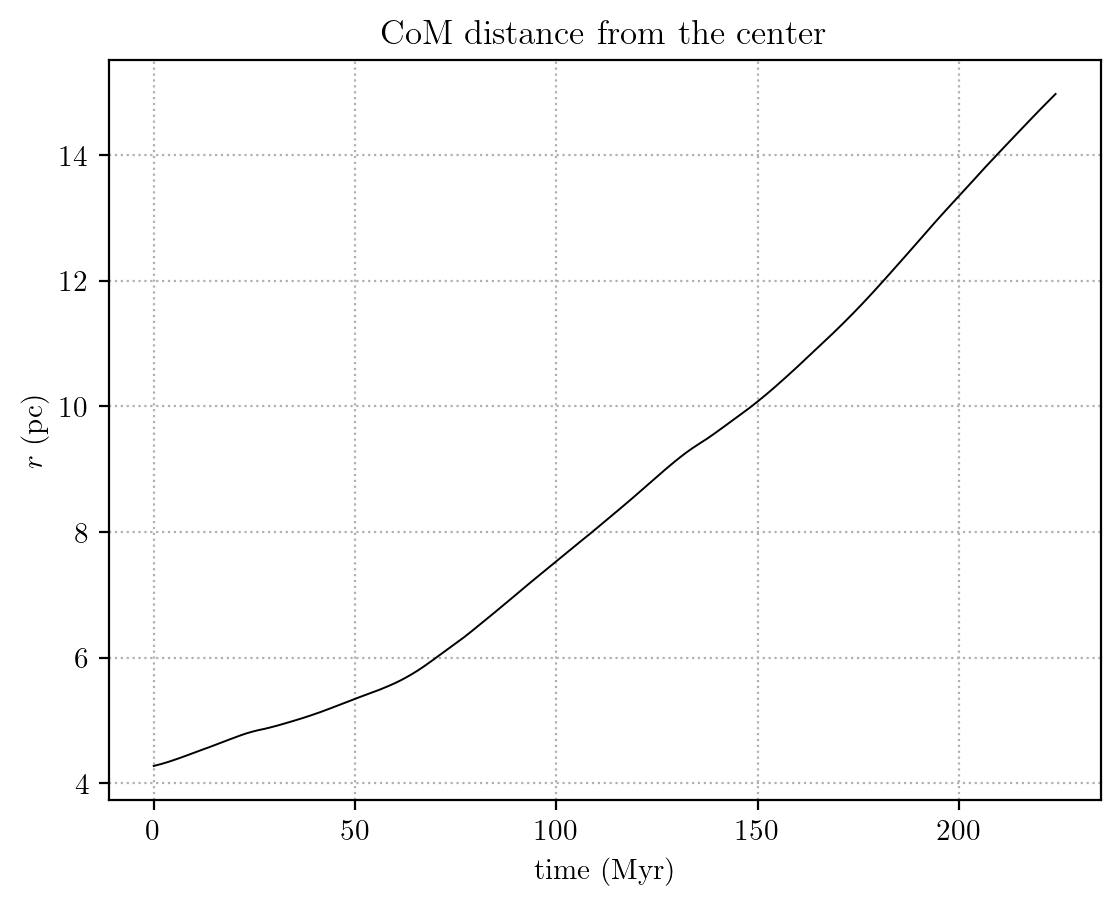

In [44]:
r_cm = gdsam.distance(pl.x_cm, pl.y_cm, pl.z_cm, 0, 0, 0)

plt.plot(pl.t, r_cm, lw=.7, c='k')

plt.title(r'CoM distance from the center')
plt.ylabel(r'$r$ (pc)')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel(r'time (Myr)')
plt.grid();


Should the center of mass position be fixed? Well, the density is not entirely homogeneous due to the discretization. Also, if you have a computation error on the forces, the center of mass will not experience any net force but it can acquire a constant velocity on some axis, due to the error on the position propagating.

### Checking density

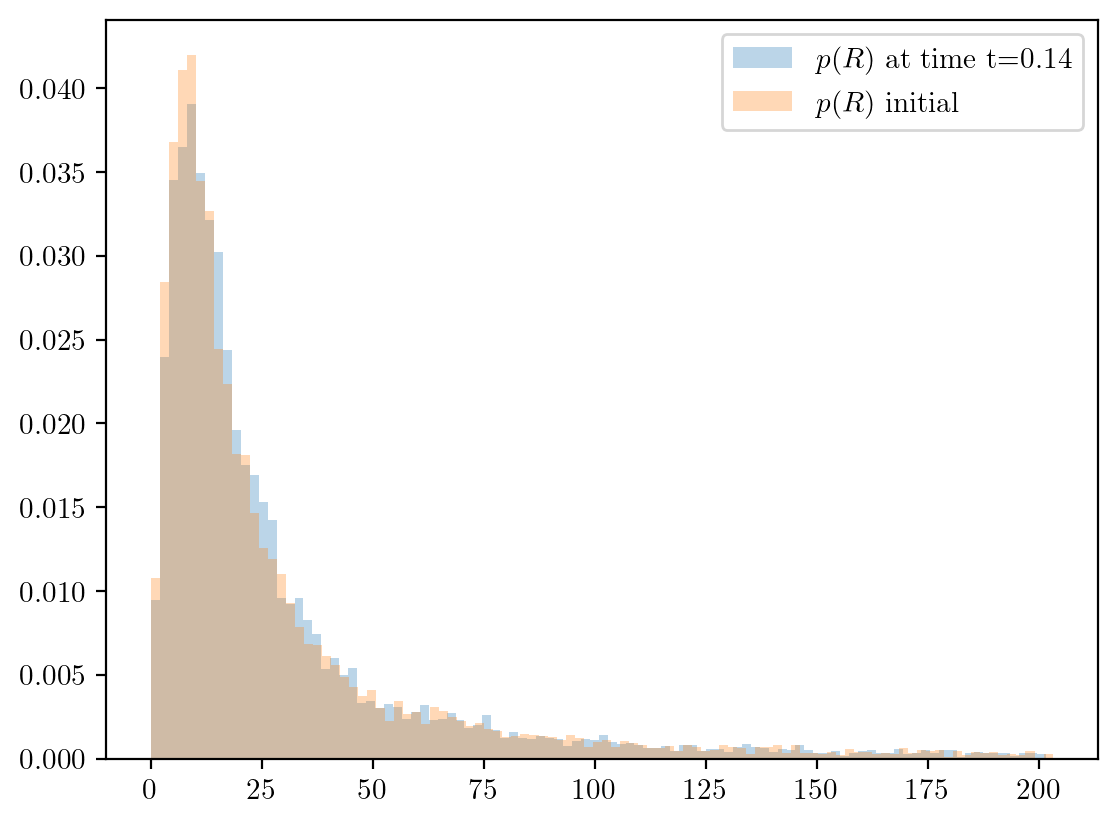

In [63]:
j = 1
R = pl.r[:,j]
z = pl.z[:,j]
plt.hist(R[R<np.percentile(R,95)], density=True,
         bins=100, alpha=.3, label=fr'$p(R)$ at time t={pl.t[j]:.2f}')
plt.hist(disk.r[disk.r<np.percentile(disk.r,95)], density=True,
         bins=100, alpha=.3, label=fr'$p(R)$ initial')
plt.legend()

plt.show()

  0%|          | 0/401 [00:00<?, ?it/s]

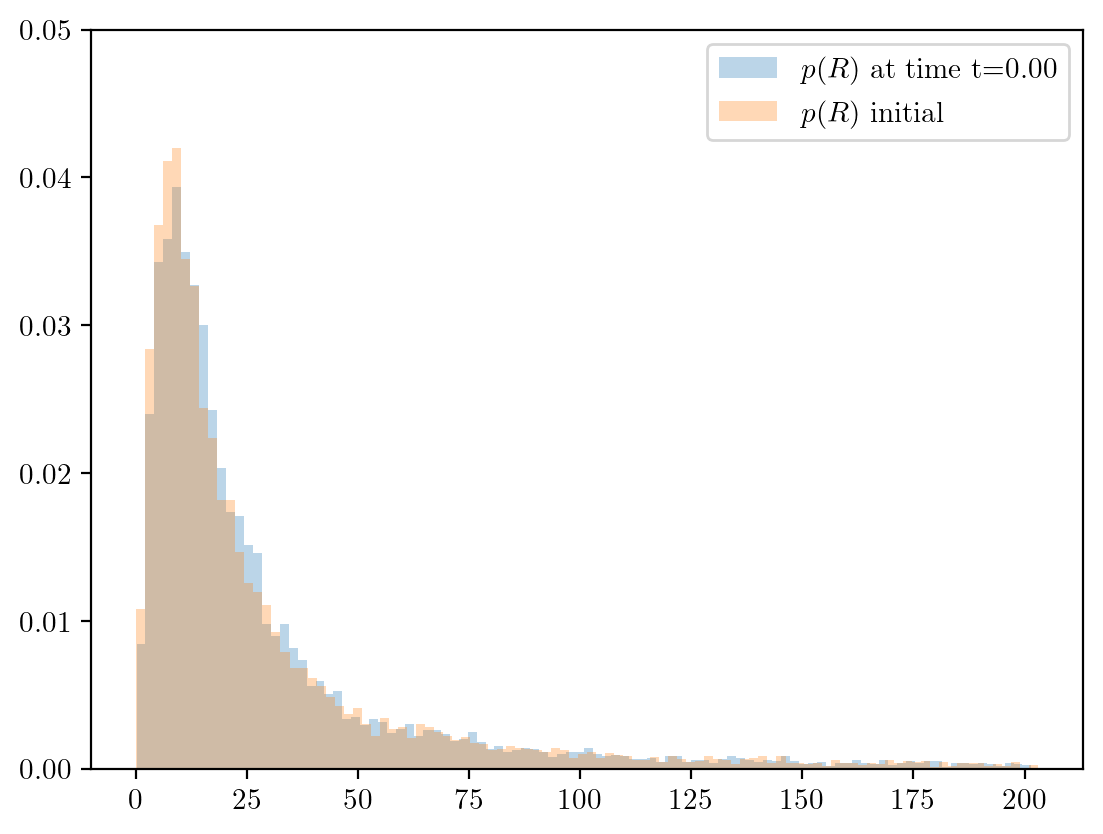

In [65]:
from IPython.display import HTML

def update(j):
    ax.clear()
    R = pl.r[:,j]
    z = pl.z[:,j]
    ax.hist(R[R<np.percentile(R,95)], density=True,
             bins=100, alpha=.3, label=fr'$p(R)$ at time t={pl.t[j]:.2f}')
    ax.hist(disk.r[disk.r<np.percentile(disk.r,95)], density=True,
             bins=100, alpha=.3, label=fr'$p(R)$ initial')
    ax.set_ylim(0,0.05)
    ax.legend()

fig, ax = plt.subplots()

ani = animation.FuncAnimation(fig, func=update, frames=tqdm(range(len(pl.t))[::4]))

HTML(ani.to_jshtml(fps=30))

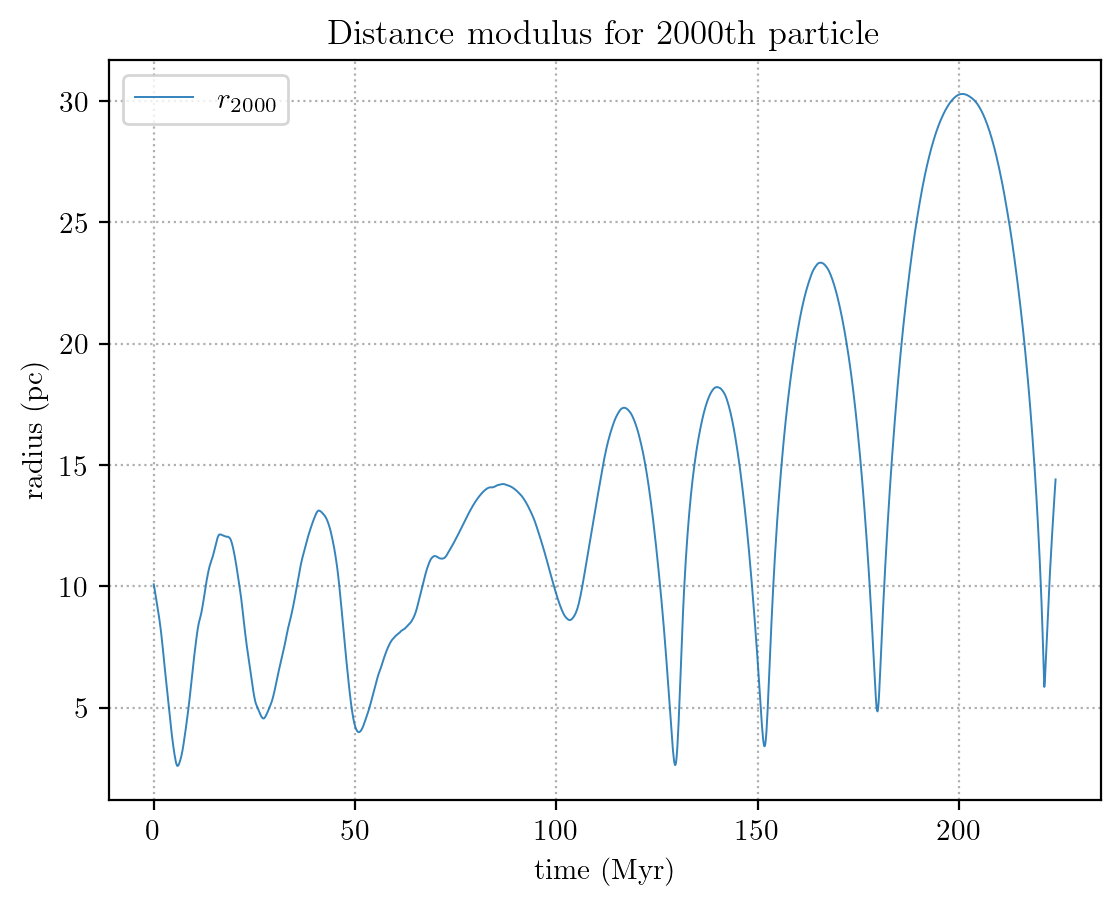

In [67]:
i=int(2e3)
plt.plot(pl.t, pl.r[i,:],lw=.7, alpha=.9,
         label=fr'$r_{{{i}}}$')

G =  4.3057e-3 #gravitational constant per 1 solar masses, 1pc, 1km/s


plt.xlabel('time (Myr)')
plt.title(fr'Distance modulus for {i}th particle')
plt.ylabel(r'radius (pc)')
plt.grid()
plt.legend();

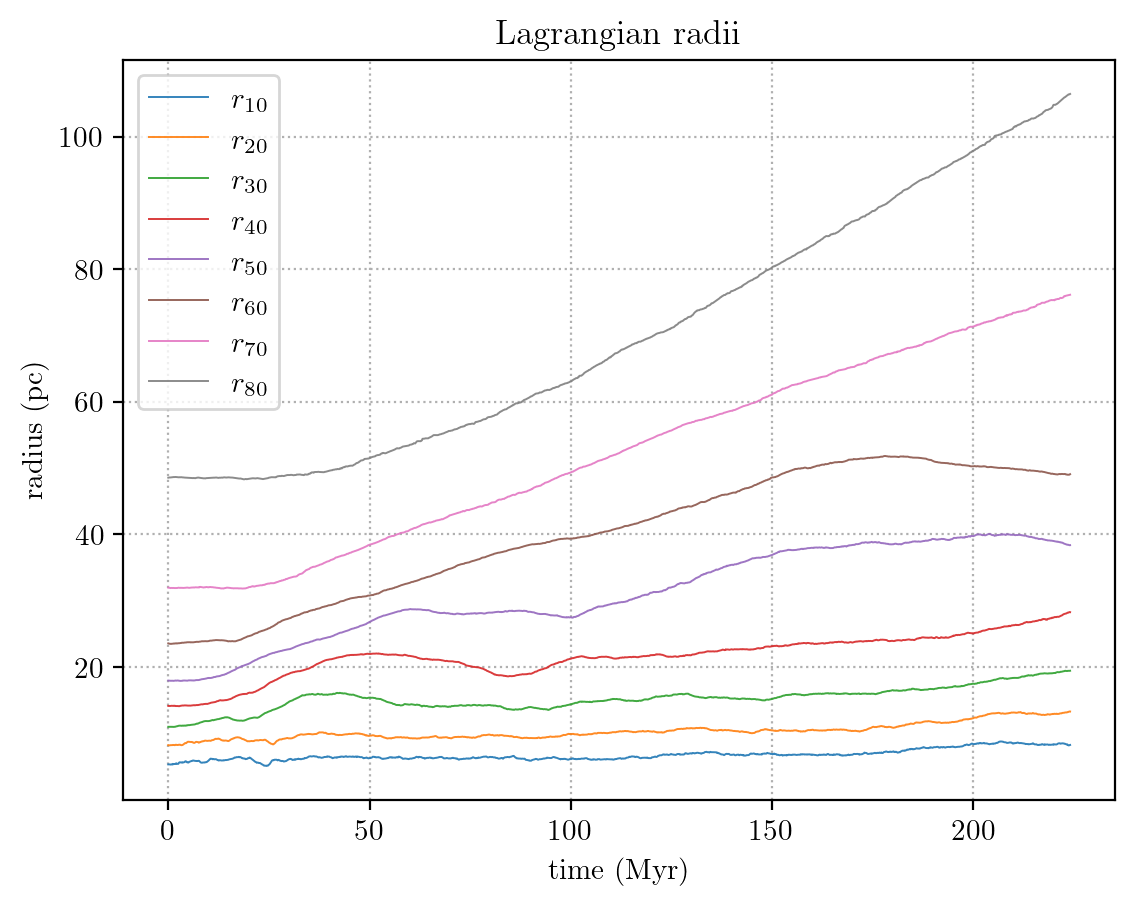

In [68]:
q = np.linspace(0.1,0.8,8)
t_i = [] #collapse time

for q_ in q:
    plt.plot(pl.t, pl.l_radii(q_),lw=.7, alpha=.9,
             label=fr'$r_{{{q_*100:n}}}$')
     

plt.xlabel('time (Myr)')
plt.title('Lagrangian radii')
plt.ylabel('radius (pc)')
plt.grid()
plt.legend(loc='upper left');

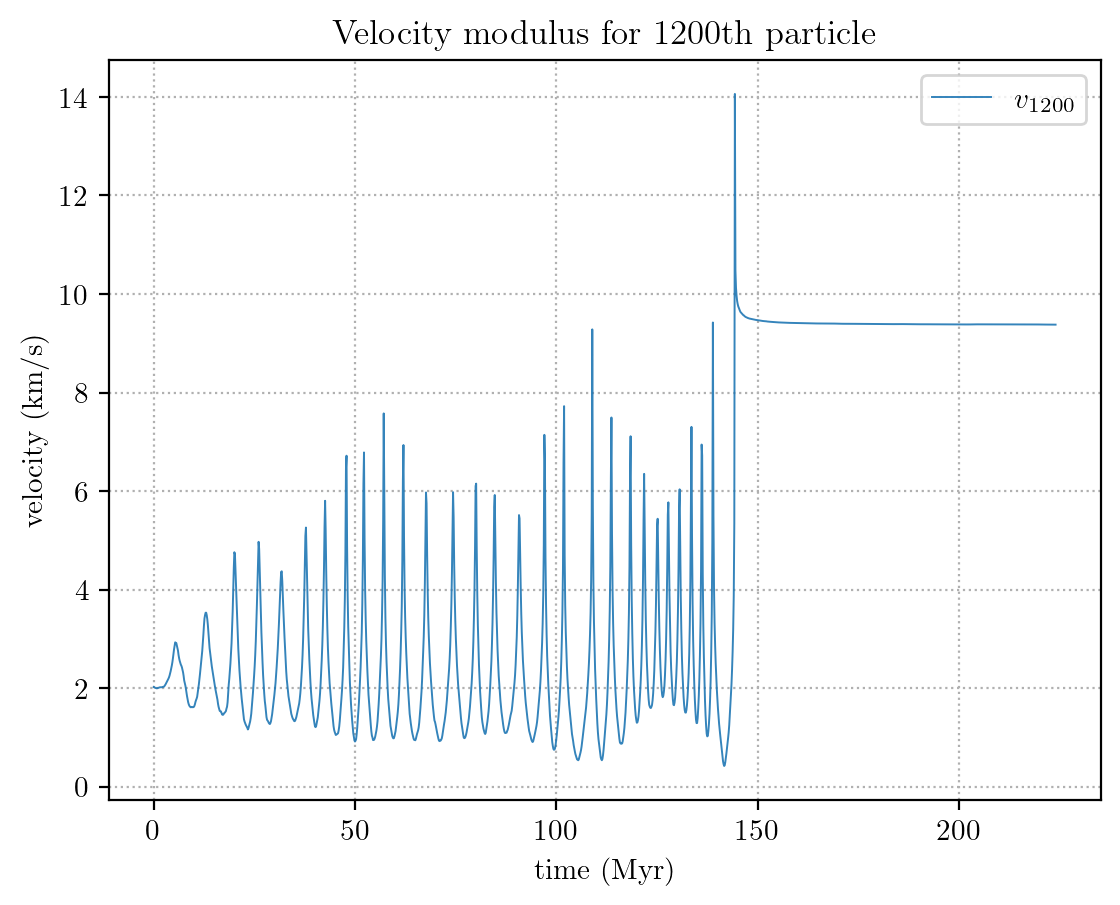

In [69]:
i=int(1.2e3)
plt.plot(pl.t, pl.v[i,:],lw=.7, alpha=.9,
         label=fr'$v_{{{i}}}$')

plt.xlabel('time (Myr)')
plt.title(f'Velocity modulus for {i}th particle')
plt.ylabel('velocity (km/s)')
plt.grid()
plt.legend();

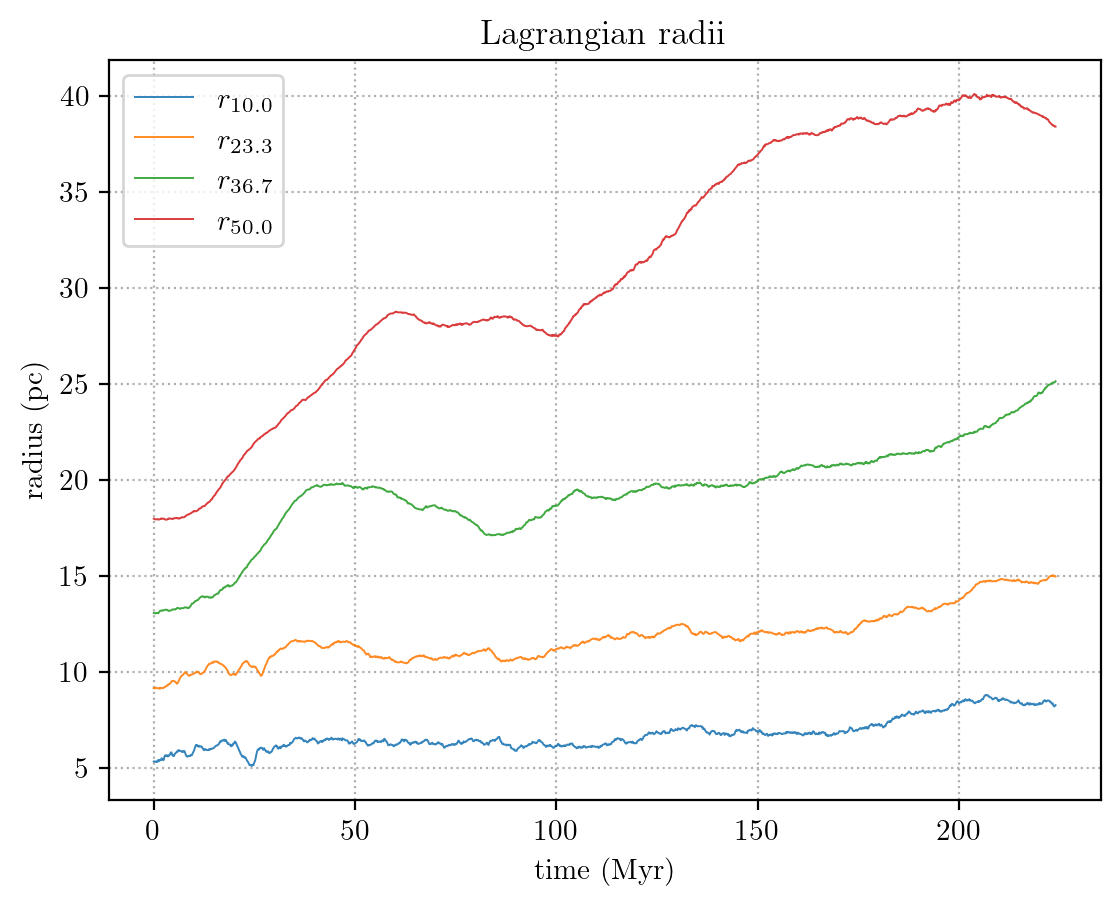

In [70]:
q = np.linspace(0.1,.5,4)
t_i = [] #collapse time

for q_ in q:
    plt.plot(pl.t, pl.l_radii(q_),lw=.7, alpha=.9,
             label=fr'$r_{{{q_*100:.1f}}}$')   

plt.xlabel('time (Myr)')
plt.title('Lagrangian radii')
plt.ylabel('radius (pc)')
plt.grid()
plt.legend(loc='upper left');

### Energy/Angular momentum conservation

In [71]:
d = pl.get_log_tree(f'{log}')
d.keys()

dict_keys(['time', '|T+U|', 'T', '-U', '-T/U', '|Vcom|', '|Jtot|', 'CPUtot'])

For the units of energy we need the following conversion:
E = $1\mathrm{erg}$ = $1\mathrm{g\cdot cm}^2 s^{-2}$ 
We have already done the conversion, so for our units
$$
E = 1\mathrm{M_\odot\cdot pc^2 Myr^{-2}} = \mathrm{2\times10^{33}g\cdot (3\times10^{18}\ cm)^2 (3.15\times 10^{7} \times 10^{6}\ s)^{-2}} = 2\times 10^{43}\ \mathrm{erg}
$$

$$
J = 1\mathrm{M_\odot\cdot pc^2 Myr^{-1}} = \mathrm{2\times10^{33}g\cdot (3\times10^{18}\ cm)^2 (3.15\times 10^{7} \times 10^{6}\ s)^{-1}} = 6\times 10^{56}\ \mathrm{erg\cdot s}
$$

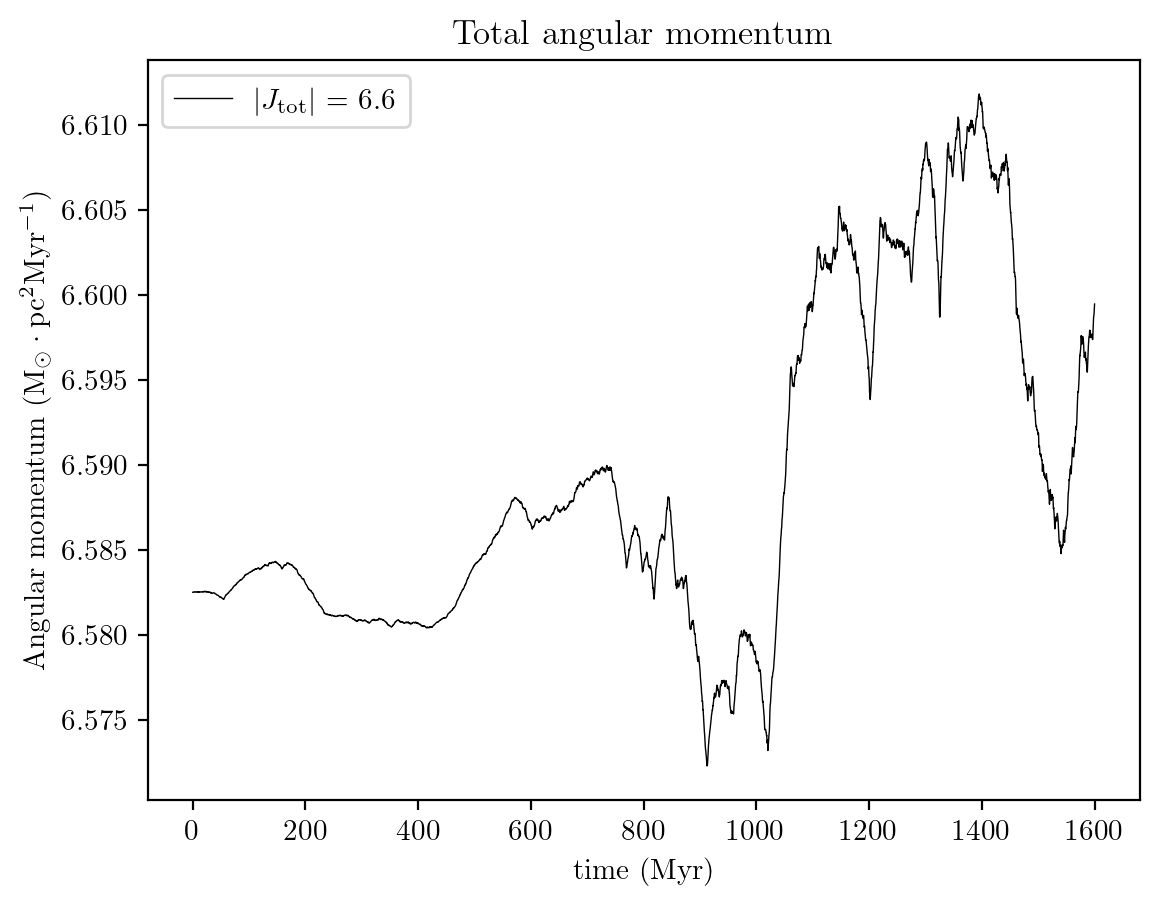

In [72]:
J = np.average(list(d['|Jtot|'].values()))

plt.plot(d['time'].values(),d['|Jtot|'].values(), lw=.5, c='k',
        label = fr'$|J_\mathrm{{tot}}|$ = {J:.1f}')
plt.title('Total angular momentum')
plt.legend()
plt.xlabel(r'time (Myr)')
plt.ylabel(r'Angular momentum ($\mathrm{M_\odot\cdot pc^2 Myr^{-1}}$)');

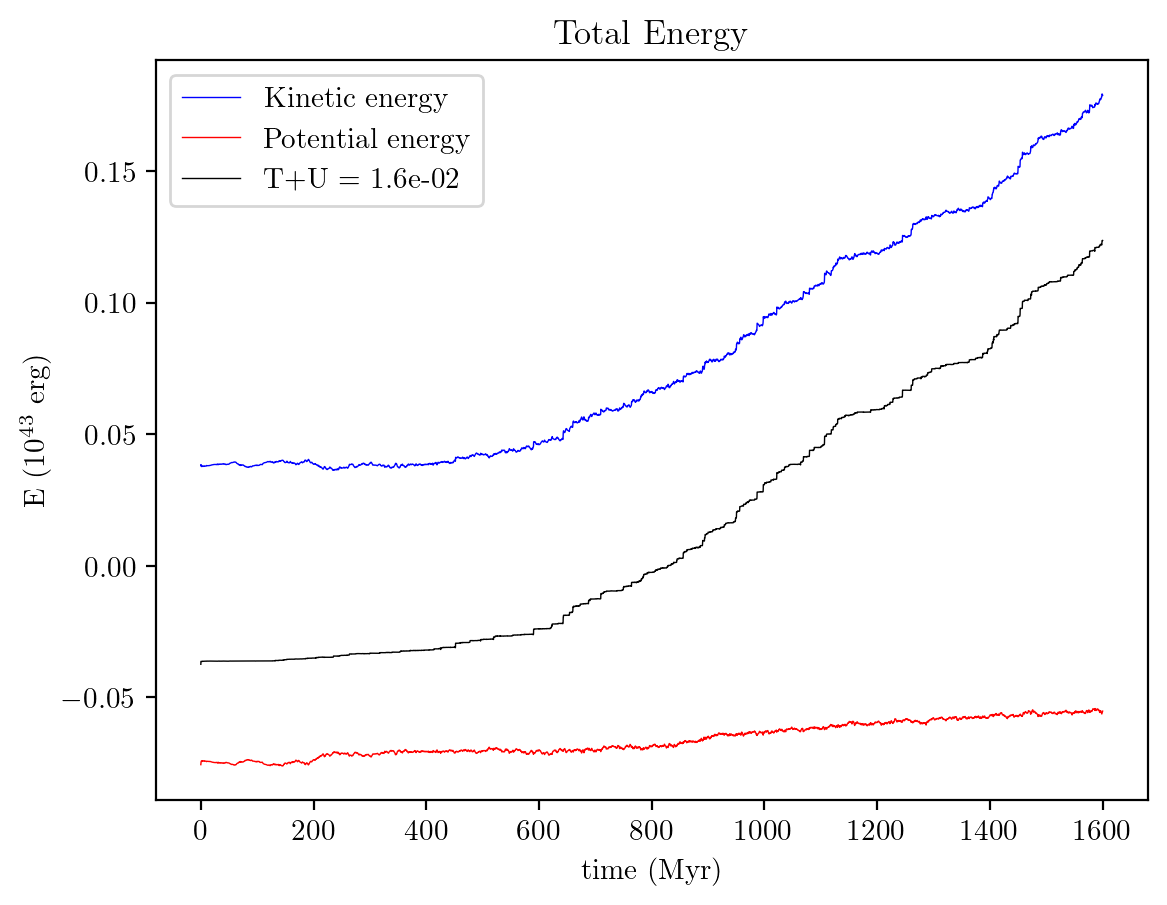

In [73]:
T = np.array([t for t in d['T'].values()])
U = np.array([-u for u in d['-U'].values()])

plt.plot(d['time'].values(),T, lw=.5, c='b', label='Kinetic energy')
plt.plot(d['time'].values(),U, lw=.5, c='r', label='Potential energy')
plt.plot(d['time'].values(),T+U, lw=.5, c='k', label=f'T+U = {np.average(T+U):.1e}')
plt.title('Total Energy')
plt.xlabel(r'time (Myr)')
plt.ylabel(r'E ($10^{43}$ erg)')


plt.legend();

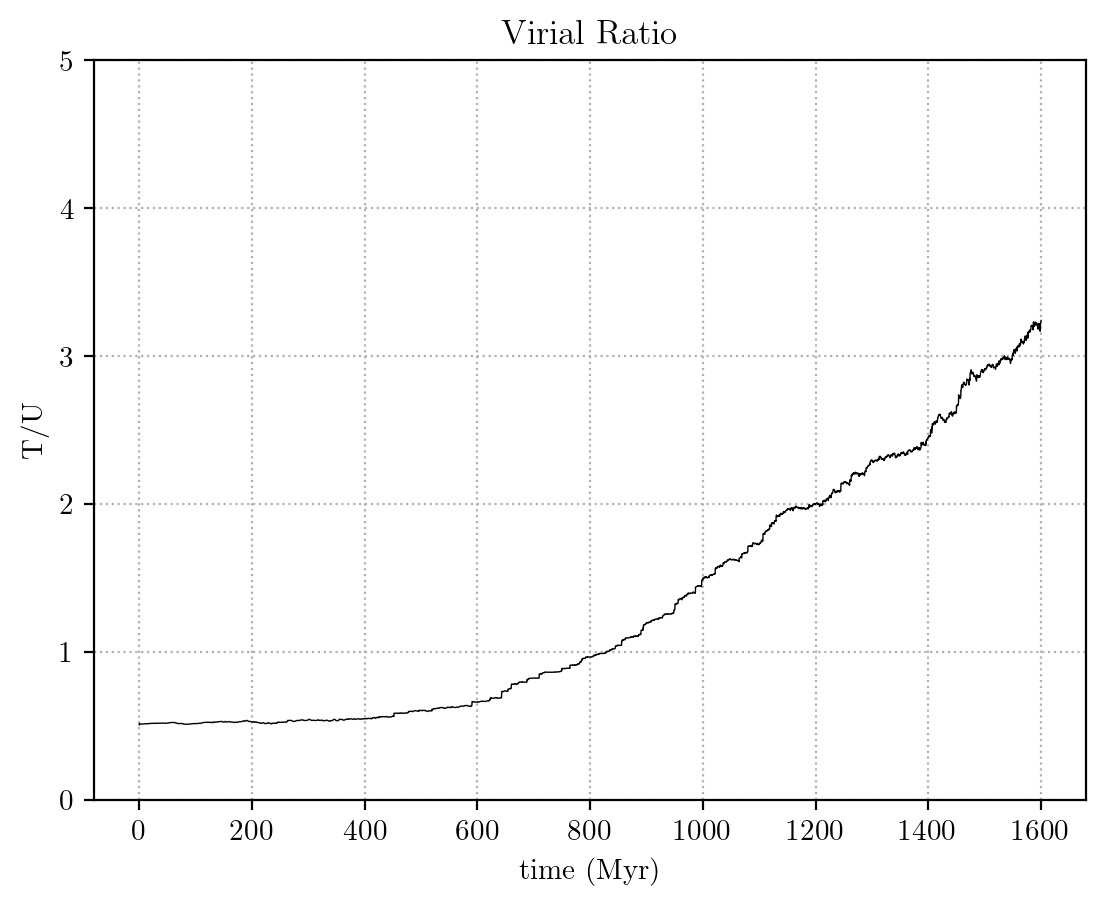

In [76]:
plt.plot(d['time'].values(),abs(T/U), lw=.5, c='k')
plt.title('Virial Ratio')
plt.xlabel(r'time (Myr)')
plt.ylabel(r'T/U')
plt.ylim(0,5)
plt.grid()
plt.show()

We care to compare this with the potential of a plummer sphere

## Is the distribution rotating?
We need to calculate the components of the angular momentum of each single particle and then sum them altogether. We use the formula

$$ \vec L = m\vec v\times \vec r$$

Therefore $L_{z_i} = mv_{z_i}r_{z_i}$

In [77]:
L_x = []
L_y = []
L_z = []

for i in range(len(pl.t)):
    L_x.append(pl.m * (pl.vy[:,i] * pl.z[:,i] - pl.vz[:,i]*pl.y[:,i]))
    L_y.append(pl.m * (pl.vz[:,i] * pl.x[:,i] - pl.vx[:,i]*pl.z[:,i]))
    L_z.append(pl.m * (pl.vx[:,i] * pl.y[:,i] - pl.vy[:,i]*pl.x[:,i]))


L_x, L_y, L_z = np.array(L_x), np.array(L_y), np.array(L_z) 

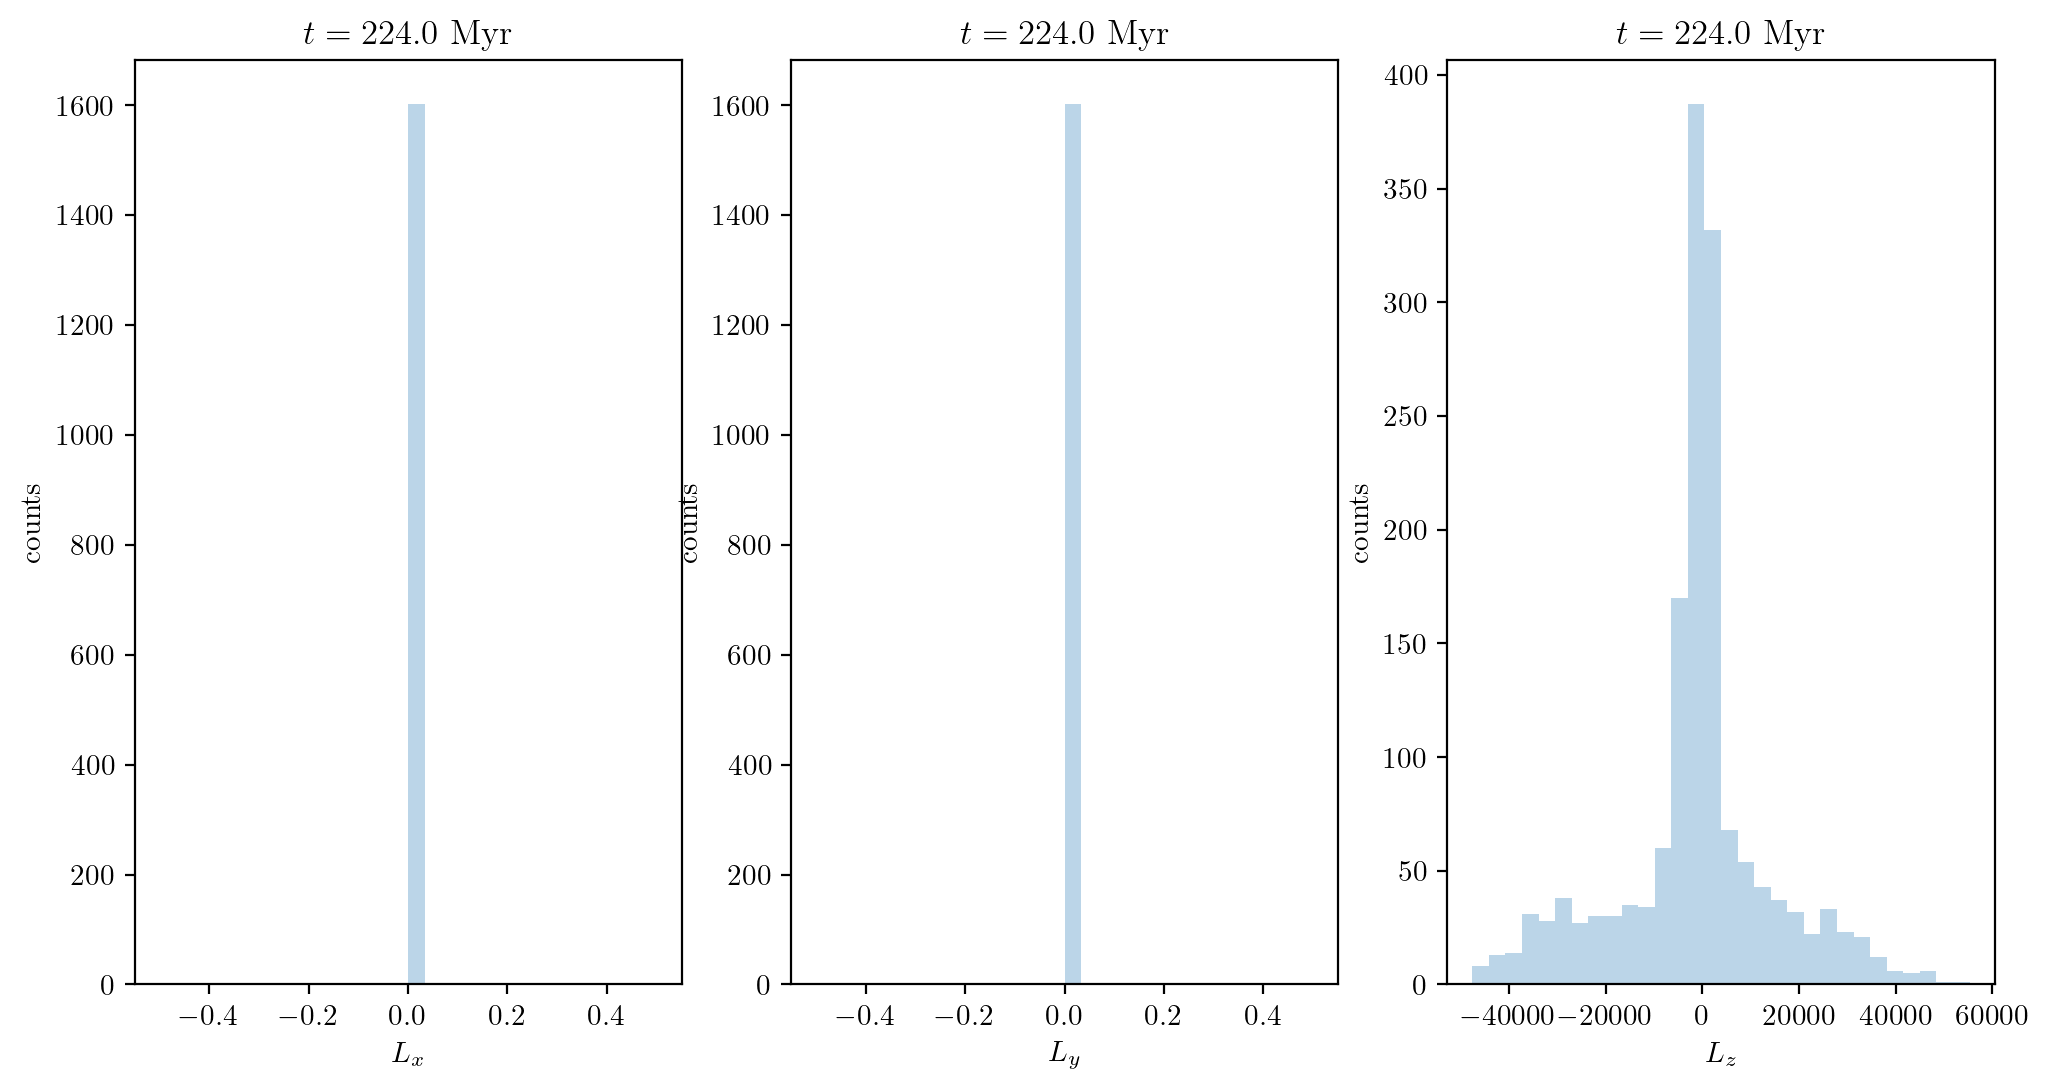

In [78]:
fig, axs = plt.subplots(1,3, figsize=(12,6))

num = -1

labels = ['L_x', 'L_y', 'L_z']

for i,ax in enumerate(axs):
    ax.set(title=fr'$t = {pl.t[num]:.1f} $ Myr', 
           xlabel=fr'${labels[i]}$', ylabel =fr'counts')

axs[0].hist(L_x[:, num], bins = 30, alpha =.3)
axs[1].hist(L_y[:, num], bins = 30, alpha =.3)
axs[2].hist(L_z[:, num], bins = 30, alpha =.3);